---
## Table of Contents
1. [Introduction](#Introduction)
2. [Data Exploration](#DataExploration)
3. [Exercise 1](#Exercise-1)
4. [Exercise 2](#Exercise-2)
5. [Exercise 3](#Exercise-3)
6. [Exercise 4](#Exercise-4)
7. [Exercise 5](#Exercise-5)
8. [Conclusion](#Conclusion)
9. [References](#References)
---

## **Introduction** <a id="Introduction"></a>

This report is a part of the coursework assignment for the **Scientific Computing for Finance** module, which evaluates the concepts and methods taught in lectures and tutorials. This report provides solutions to five Python exercises focused on finance such as stock analysis on a given dataset.

Each exercise will be structured as follows:
1. **Exercise Number**: A unique identifier for each exercise.
2. **Exercise Definition**: The task description.
3. **Solution (Approach Followed)**: A description followed to solve the porblem such as key steps and any considerations made.
4. **Code Explanation Section**: Clear explanation of the analysis and of the implementated code.
5. **Code Implementation**: Python code solving the exercise, with comments explaining key actions taken.

Additionally, as per the assignment requirements, the following Python libraries will be utilized within some the exercises:
1. **numpy** &rarr; Numerical Python used widely for numerical computing such as handling arrays, matrices and the application of various methematical operations. For convenience, the numpy module will be import as `np` to make it easier to reference throughout the code.
2. **pandas** &rarr; Pandas is a Python library used for working with data sets. It has functions for exploring, analyzing, cleaning, and manipulating data. The Pandas library provides DataFrame and Series objects for efficient data operations. For convenience, the pandas module will be imported as `pd` to simplify its usage throughout the code.
3. **matplotlib** &rarr; Used for creating static, animated and interactive visualizations. The pyplot module will be used from this library simplifying creating plots and charts. The `%matplotlib inline` will be also used to display the plots directly within the Jupyter Notebook. For convenience, the pyplot module will be import as `plt` to make it easier to reference throughout the code.
4. **yfinance** &rarr; A Python package that retrieves Yahoo Finance financial market data. It offers a practical means of retrieving past market data for analysis of stocks, indices, and other financial instruments. In this project, stock data is downloaded from yfinance (Exercise 3) for further research, like performing statistical tests or computing log-returns. For convenience, the yfinance module will be import as `yf` to make it easier to reference throughout the code.
5. **statsmodels** &rarr; Statsmodels is a statistical modeling library in Python. The `formula.api` from this library is used to fit statistical models using formula notation, enabling simpler and more efficient regression modeling. For convenience, this will be imported as `sm`.
6. **SciPy** &rarr; SciPy is a Python library used for scientific computing. It provides multiple useful modules for optimization, integration, linear algebra, statistics and more. For convenience, the `scipy.stats` module will be imported as `stats`. Furthermore, from the `scipy.stats` module the `gaussian_kde` is imported used in Exercise 1 and 3 to estimate the density of the data, the `skew` and `kurtosis` as well which are used to measure the asymmetry and the "tailedness" of the data distribution.
7. **StringIO** &rarr; The StringIO module is imported to simulate a file-like object from a string, allowing you to use string data as input for functions (like pd.read_csv) that typically expect a file. This is useful for processing data directly from a string without needing to save it to an actual file (especially when more than 1 people are running/working the code).

In [1]:
# Import of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.formula.api as sm
import scipy.stats as stats
from scipy.stats import gaussian_kde, skew, kurtosis, jarque_bera
from io import StringIO
%matplotlib inline

---

## **Data Exploration** <a id="DataExploration"></a>

Before we dive into the exercises the given csv will be loaded by using the `read_csv()` function of pandas and pass it as an argument the '*sap100.csv*' file that has been downloaded and saved in the same directory of this Jupyter Notebook, thus only the full file name within quotes is enough - no file path is required. This function reads the comma-separated values (CSV) file into a DataFrame named **prices**.  The `head()` function is then used to display the first 5 rows (default value) of the DataFrame. 
#### Key Notes:
1. The first row of the CSV is automatically interpreted as the column headers of the DataFrame.
2. Since no index column was specified, automatic indexing occurs, starts from 0.
3. The first data row (excluding the column headers) starts at index 0.

To better understand the dataset and make sure it has the information needed for the analysis, data exploration and validation are essential prior to beginning the exercises. The data exploration steps taken are as followed:
1. Initially, the `shape` property is called on the **prices** to return a tuple that defines the dimensionality of the DataFrame (rows, columns).
2. The `dtypes` and `value_counts()` methods are used to provide a summary of the data types for all columns in the DataFrame. This is an essential step to ensure the data types align with the analysis requirements and detect any unexpected types.
3. As we are aware now that all the data (different stock close prices) are floats and we have only 1 object data type, we can move on and get some further information for the numerical values.
4. The `describe()` method is used to generate summary statistics for the numerical columns, such as count, mean, standard deviation, minimum, maximum, and quartiles. Having this can help us to understand the distribution and the range of the data.
5. Use the methods `isnull().sum()` in order to help identifying incomplete or missing data and a condition has been set within the `print()` function which displays only the columns that are have greater than 0 null values (alongside with their sum of null values). 
6. **Remove the columns with null values** by applying the `drop(columns=["BRK.B", "DOW", "FB"])` on the DataFrame. This is an essential step in order to proceed with some exercises later (e.g., coefficients of alpha and beta) but also useful as it will reduce the DataFrame (prices) computation time (as there is less data). The 'DOW' stock column contains a significant number of null values (as the stock was added later than the start date of the data in the SP 100 index), specifically 701 out of 1788 data points, representing approximately 39% of missing data. Due to this high proportion of missing values, the column has been excluded from the analysis to maintain data integrity and ensure accurate results. Retaining this column could potentially skew the findings, which is why it was omitted. Additionally, while data for 'FB' (now 'META') and 'BRK.B' (retrieved as 'BRK-K' on Yahoo Finance) is available, I opted to work with the provided dataset and simply drop the columns with missing data for consistency.

In [2]:
# Load data from 'sap100.csv' into 'prices'
prices = pd.read_csv('sap100.csv')

# Display the first 5 rows of 'prices'
prices.head()

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
0,2016-06-06 00:00:00,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
1,2016-06-07 00:00:00,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2,2016-06-08 00:00:00,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
3,2016-06-09 00:00:00,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
4,2016-06-10 00:00:00,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


In [3]:
# Dimensions of the DataFrame (rows, columns)
prices.shape

(1788, 102)

In [4]:
# Summary of column data types
column_summary = prices.dtypes.value_counts()
print(column_summary)

float64    101
object       1
dtype: int64


In [5]:
# Summary statistics for the DataFrame
prices.describe()

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
count,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,...,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000
mean,88.567633,51.806611,57.290081,46.376798,113.751460,75.752835,84.783202,322.910954,52.157327,208.423764,...,94.546009,111.081499,130.262050,314.834885,170.119572,141.421253,49.313688,166.912248,101.003249,212.473577
std,51.746535,6.577539,16.768592,9.366509,27.691386,19.184395,28.223178,150.184198,10.153199,33.309175,...,34.099929,112.268760,40.236290,123.198603,46.218261,38.840371,7.509169,51.149971,29.859467,74.909810
min,23.010000,34.459999,28.370001,21.139999,65.660004,31.450001,36.950001,90.849998,18.780001,135.220001,...,41.099998,11.931333,59.070000,133.619995,82.489998,86.169998,28.680000,73.339996,55.779999,109.290001
25%,42.764375,48.384999,42.857500,42.852501,88.114998,62.679999,59.490000,215.529999,47.522499,178.375004,...,63.702499,19.799334,98.619997,225.110004,134.260002,109.127499,44.250000,122.264999,78.222498,152.235004
50%,66.256248,53.225000,53.495001,47.805000,117.794998,79.730000,85.369999,302.630005,54.095001,207.639999,...,79.935001,26.987667,120.855000,274.104996,170.955002,118.590000,51.355000,179.740005,94.505001,194.145004
75%,141.872501,56.912499,71.897499,53.304999,140.300003,86.175001,109.252501,440.619987,59.735001,236.762497,...,129.362499,215.679169,170.830006,420.977509,207.794994,177.802494,54.424998,211.184994,117.062498,279.562508
max,193.970001,62.070000,87.730003,65.930000,159.869995,119.169998,141.460007,688.369995,67.199997,292.390015,...,152.410004,409.970001,201.289993,555.150024,276.690002,232.110001,63.250000,250.929993,174.960007,415.420013


In [6]:
# Check for columns with greater than 0 null values
null_counts = prices.isnull().sum()
print("Columns along with their sum of null values:")
print(null_counts[null_counts > 0])

Columns along with their sum of null values:
BRK.B    1788
DOW       701
FB       1788
dtype: int64


In [7]:
# Remove the columns with the null values
prices = prices.drop(columns=["BRK.B", "DOW", "FB"])
prices
null_counts = prices.isnull().sum()

# Verify no nulls are left
print("Columns along with their sum of null values:")
print(null_counts[null_counts > 0])

Columns along with their sum of null values:
Series([], dtype: int64)


---

## **Exercise 1** <a id="Exercise-1"></a>
Choose a single stock from the index, and compute the corresponding daily, monthly and annual log-returns. For each sampling frequency, test whether the returns are normally distributed. Include appropriate graphs in your final report and ensure that you clearly explain your analysis in your own words.


### Solution
Multiple actions are taken in order to satisfy the requirements of this exercise which have been listed and explained below. These actions are seperated as different steps, and as mentioned in the introduction of this report, the code will be explained right before each step is taken. Briefly, for this exercise the date was set as an index of the dataframe, the close price of the stock for different time intervals (day, month, year) has been visualized, log returns were computed for these intervals and passed as dataframes in new variables. Lastly, some additional visualisation such as histograms, probability plots and boxplots took place to understand if the the distribution of the data for each dataframe (interval) could possibly be a normal distribution. 

For this exercise the **`GOOGL`** stock was chosen to be analysed. Steps taken:
<p style="color:blue; font-weight:bold;"> 1. Setting Date as an Index of the DataFrame</p>
The 'Date' column is set as an index of the DataFrame and also the column remains still as the first column of the DataFrame.
<p style="color:blue; font-weight:bold;"> 2. Stock Prices for Daily, Monthly, and Yearly Trends</p>
This section visualizes the GOOGL stock prices across three timeframes: daily, monthly, and yearly, using subplots for better visualization.
<p style="color:blue; font-weight:bold;"> 3. Plots of Log-Returns for Daily, Monthly, and Yearly Trends </p>
This section calculates and visualizes the daily, monthly, and yearly log-returns for GOOGL stock prices. The plots provide insights into the stock's return behavior across different timeframes, highlighting patterns and volatility.
<p style="color:blue; font-weight:bold;"> 4. Boxplots for Log-Returns of the Daily, Monthly and Yearly DataFrames </p>
Visual representation of the distribution, spread, and potential outliers in GOOGL's daily, monthly, and yearly log-returns.
<p style="color:blue; font-weight:bold;"> 5. Descriptive Statistics for Daily, Monthly and Yearly Log-Returns </p>
DataFrame with the summary statistics highlighting the key metrics for GOOGL's daily, monthly, and yearly log-returns.
<p style="color:blue; font-weight:bold;"> 6. Frequencies and Probability Plots for Daily, Monthly and Yearly Log-Returns </p>
This section visualizes the distribution of GOOGL's daily, monthly, and yearly log-returns through histograms and probability plots.

### Step 1: Setting Date as an Index of the DataFrame
The code below is setting the 'Date' column as an index and displays the changes.

Code explanation:
1. `set_index()`: This function is used to set the **'Date'** column as the index of the **prices** DataFrame. 
2. `pd.to_datetime(prices['Date'])`: Converts the **'Date'** column to a datetime object for handling of time-series data.
3. `inplace=True`: Updates the DataFrame directly without the need of saving it in another variable (or creating a new one).
4. `prices.head()`: Displays the first 5 rows of the updated DataFrame to view the dataframe after the changes.

As noticed, now the Date is set as an index and also it remains as the first column of the dataframe too.

In [8]:
# Convert 'Date' to a datetime type
prices['Date'] = pd.to_datetime(prices['Date'])
# Set Date as index of prices df
prices.set_index(prices['Date'], inplace=True)
prices.head()

,Date,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,...,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-06,2016-06-06,24.657499,50.709999,78.660004,50.490002,71.050003,89.339996,39.169998,99.120003,57.290001,...,43.070000,14.712000,61.290001,138.149994,86.849998,103.110001,42.880001,80.540001,62.820000,119.599998
2016-06-07,2016-06-07,24.757500,51.750000,79.120003,50.270000,71.029999,90.709999,38.930000,98.519997,57.060001,...,43.740002,15.489333,61.560001,136.940002,87.570000,103.870003,42.660000,80.599998,63.099998,119.650002
2016-06-08,2016-06-08,24.735001,51.520000,79.440002,50.000000,71.279999,90.790001,38.910000,98.680000,56.919998,...,43.910000,15.701333,62.080002,140.399994,89.040001,104.690002,42.810001,81.650002,61.730000,119.320000
2016-06-09,2016-06-09,24.912500,51.950001,79.010002,49.139999,71.089996,90.669998,38.869999,98.070000,56.099998,...,43.080002,15.290667,62.139999,140.679993,89.389999,104.970001,42.540001,81.260002,60.750000,119.440002
2016-06-10,2016-06-10,24.707500,52.669998,82.470001,48.340000,71.139999,89.980003,38.400002,97.089996,54.990002,...,41.930000,14.586000,61.910000,139.240005,88.779999,104.519997,41.959999,80.180000,61.000000,118.269997


### Step 2: Stock Prices for Daily, Monthly, and Yearly Trends
The code below is plotting the stock price of GOOGL in 3 different intervals (time frequencies).

Code explanation:
1. Create a new variable named **googl_daily_prices** getting only the data for 'GOOGL' column.
2. The `subplots()` function is used from matplotlib.pytplot to create a figure with 1 row and 3 columns of subplots to display GOOGL's daily, monthly, and yearly stock prices horizontally (each one next to each other). **fig** represents the entire figure, and **axes** is an array of subplot objects. The figure size (width, height) has been set by using `figsize=(14, 4)`. After several adjustments on the parameter values of figsize, I believe that the selected values fit better for these 3 graphs.
3. Two additional variables (Series with dtype: float64) have been derived from **googl_daily_prices** using pandas methods `resample('M')` to group the data by month (and year respectively resample('Y')) and `last()` which selects the final value of each month to represent the monthly price.
4. For each subplot an axes has been defined so they do not overlap between them. Also, title and y labels have been defined. As a x axis no need for a label as the index is Date and it will be displayed on the axis.
5. Before calling `show()`, `tight_layout()` is used to ensure that the subplots are well-spaced and do not overlap. 

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations on returns based on the different time intervals: </p>
The left chart (daily) contains more data points due to its higher frequency, providing a detailed view of price movements. On the other hand, the monthly and yearly charts have fewer data points, resulting in smoother lines, with the yearly chart being the smoothest, highlighting longer-term trends.

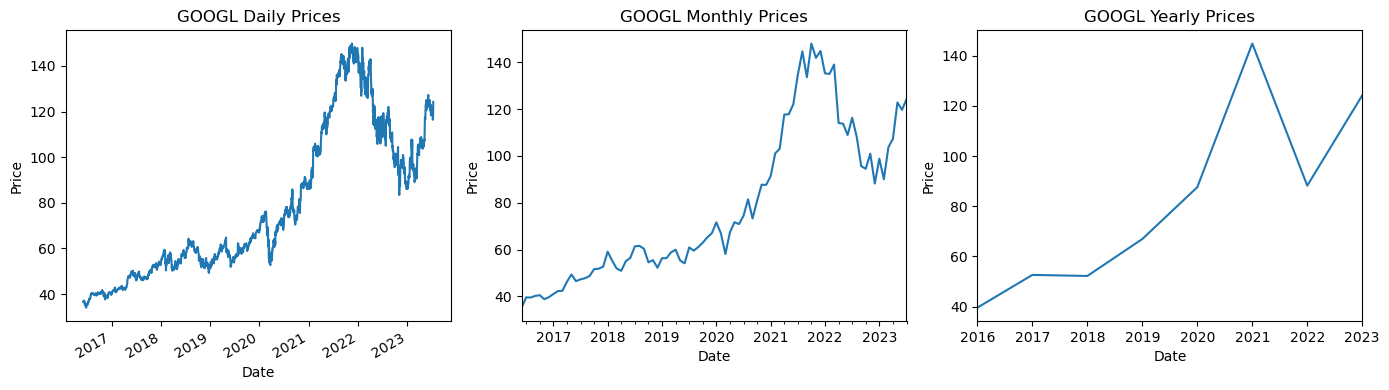

In [9]:
# Get 'GOOGL' prices
googl_daily_prices = prices['GOOGL']

# Plot daily, monthly, and yearly 'GOOGL' stock prices on subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot 'GOOGL' daily prices (left graph)
googl_daily_prices.plot(ax=axes[0], title="GOOGL Daily Prices")
axes[0].set_ylabel("Price")

# Plot 'GOOGL' monthly prices (middle graph)
monthly_prices = googl_daily_prices.resample('M').last()
monthly_prices.plot(ax=axes[1], title="GOOGL Monthly Prices")
axes[1].set_ylabel("Price")

# Plot 'GOOGL' yearly prices (right graph)
yearly_prices = googl_daily_prices.resample('Y').last()
yearly_prices.plot(ax=axes[2], title="GOOGL Yearly Prices")
axes[2].set_ylabel("Price")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Step 3: Plots of Log-Returns for Daily, Monthly, and Yearly Trends

This code calculates and visualizes GOOGL's log-returns across three frequencies: daily, monthly, and yearly. Please note that the listed steps below have been applied for each interval (daily, monthly and annualy).

Code explanation:
1. **Calculation of Log-Returns**: The `np.log()` computes the natural logarithm of the prices which has been passed as an argument within `np.diff()` that computes the difference between each consecutive pair of log-transformed prices, representing the change in returns over time. 
2. **Conversion to DataFrames**: Log-returns are stored in DataFrames (**daily_returns_df**, **monthly_returns_df**, **yearly_returns_df**) for the ease of plotting. The `index=googl_daily_prices.index[1:]` (example of daily) is set to ensure that the new DataFrame has a proper time-based index that aligns with the calculated log-returns.
3. **Subplots**: Adjust the figure size (width and height) by calling the `figure(figsize=(14, 8))`. As the daily log returns are more frequent (contain more data points than monthly and yearly), the plot has been place in the top row alone while the other two plots share a single row to make the visualization easier to understand. The adjustment of the plot positioning happened by calling the `add_subplot()` on the **fig** where 3 values are passed as arguments to define the rows, columns and position of the subplot in the grid respectively.
4. **Layout and Display**: The `tight_layout()` is used for same purposes as earlier - to ensure no overlap, and `plt.show()` displays the plots.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;">Observations from the Log-Return plots: </p>
The daily log-returns exhibit high volatility with frequent fluctuations, indicating short-term noise. The monthly log-returns are smoother, revealing clearer trends and intermediate fluctuations. The yearly log-returns are the most stable, showing distinct upward or downward trends over the years, with less noise and more aggregated movement.

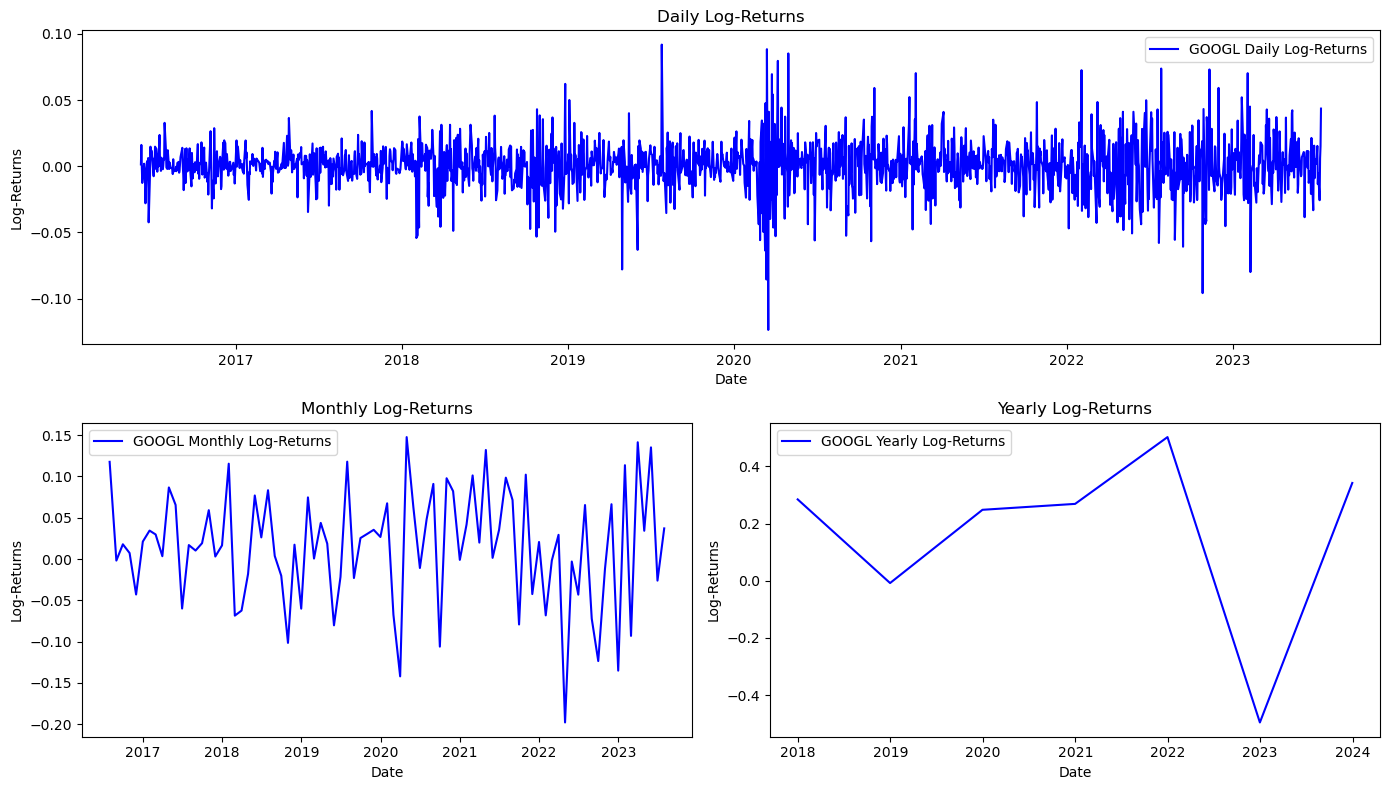

In [10]:
# Calculate daily, monthly, and yearly log-returns for 'GOOGL'
daily_returns = np.diff(np.log(googl_daily_prices))
monthly_returns = np.diff(np.log(monthly_prices))
yearly_returns = np.diff(np.log(yearly_prices))

# Convert the returns to DataFrames
daily_returns_df = pd.DataFrame({'GOOGL daily log returns': daily_returns}, index=googl_daily_prices.index[1:])
monthly_returns_df = pd.DataFrame({'GOOGL monthly log returns': monthly_returns}, index=monthly_prices.index[1:])
yearly_returns_df = pd.DataFrame({'GOOGL yearly log returns': yearly_returns}, index=yearly_prices.index[1:])

# Set the figure size and create subplots for each log return (daily, monthly and yearly)
fig = plt.figure(figsize=(14, 8))

# Daily log-returns (top plot)
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(daily_returns_df, label="GOOGL Daily Log-Returns", color='blue')
ax1.set_title("Daily Log-Returns")
ax1.set_xlabel("Date")
ax1.set_ylabel("Log-Returns")
ax1.legend()

# Monthly log-returns (bottom left plot) 
ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(monthly_returns_df, label="GOOGL Monthly Log-Returns", color='blue')
ax2.set_title("Monthly Log-Returns")
ax2.set_xlabel("Date")
ax2.set_ylabel("Log-Returns")
ax2.legend()

# Yearly log-returns (bottom right plot) 
ax3 = fig.add_subplot(2, 2, 4)
ax3.plot(yearly_returns_df, label="GOOGL Yearly Log-Returns", color='blue')
ax3.set_title("Yearly Log-Returns")
ax3.set_xlabel("Date")
ax3.set_ylabel("Log-Returns")
ax3.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Step 4: Boxplots for Log-Returns of the Daily, Monthly and Yearly DataFrames
Code explanation:
1. **Create Subplots**: A figure with 1 row and 3 columns is created using `plt.subplots(1, 3, figsize=(12, 4))`.
2. **Returns Boxplot**: A boxplot for daily, monthly and annually log-returns is created on axes 0,1 and 2 respectively, with a title and y-axis label added.
5. **Adjust Layout**: As in other steps above, the `plt.tight_layout()` ensures proper spacing between the subplots before displaying the final figure.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from Boxplots: </p>

1. **mean** 
    * daily &rarr; 0.00
    * monthly &rarr; 0.02
    * annually &rarr; 0.28
2. **approximate range**: 
    * daily &rarr; between -0.03 to 0.04 with most of the data points -0.01 and 0.01
    * monthly &rarr; between -0.14 to 0.15 with most of the log returns being between -0.02 and 0.06
    * annually &rarr; from 0 to 0.5 with most of the log-returns being between 0.1 and 0.3
3. **outliers**: 
    * daily &rarr; many outliers above and below the approximate range 
    * monthly &rarr; a single outlier around -0.2
    * annually &rarr; a single outlier around -0.5

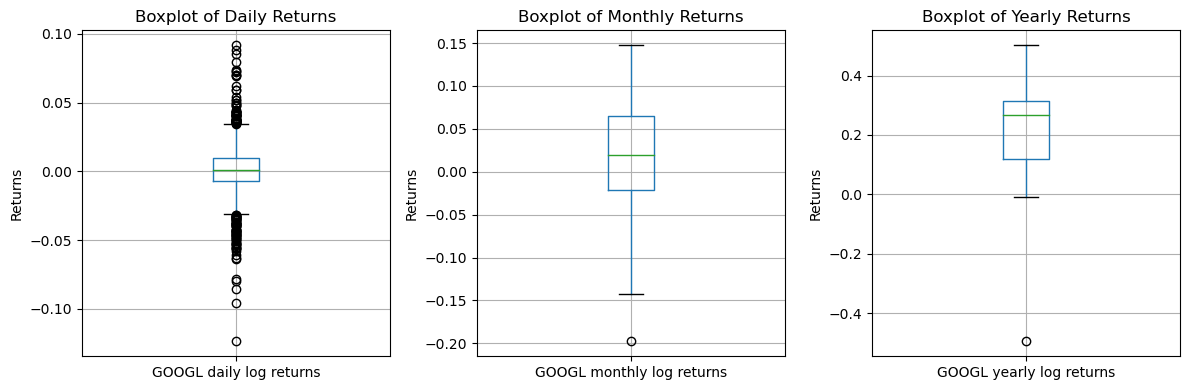

In [11]:
# Create a figure with 1 row and 3 columns for subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Boxplot for daily returns
daily_returns_df.boxplot(ax=axes[0])
axes[0].set_title("Boxplot of Daily Returns")
axes[0].set_ylabel("Returns")

# Boxplot for monthly returns
monthly_returns_df.boxplot(ax=axes[1])
axes[1].set_title("Boxplot of Monthly Returns")
axes[1].set_ylabel("Returns")

# Boxplot for yearly returns
yearly_returns_df.boxplot(ax=axes[2])
axes[2].set_title("Boxplot of Yearly Returns")
axes[2].set_ylabel("Returns")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Step 5: Descriptive Statistics for Daily, Monthly and Yearly Log-Returns
This code computes and combines the descriptive statistics for daily, monthly, and yearly log-returns:
1. `describe()`: Calculates key metrics (statistics) for each frequency.
2. `pd.concat()`: Combines all of the statistics into one DataFrame and gives each column a hierarchical name so that comparisons are simple.
3. Output: A combined DataFrame displaying the descriptive statistics for all three frequencies side by side.

Having this, we can quickly view the daily, monthly and yearly statistics for the log-returns of 'GOOGL'

In [12]:
# Display all descriptive statistics
daily_stats = daily_returns_df.describe()
monthly_stats = monthly_returns_df.describe()
yearly_stats = yearly_returns_df.describe()

# Combine all descriptive statistics into a single DataFrame
combined_stats = pd.concat([daily_stats, monthly_stats, yearly_stats], axis=1)

# Display the combined DataFrame
combined_stats

,GOOGL daily log returns,GOOGL monthly log returns,GOOGL yearly log returns
count,1787.000000,85.000000,7.000000
mean,0.000685,0.014843,0.163237
std,0.018174,0.070525,0.327590
min,-0.123685,-0.197801,-0.495765
25%,-0.006866,-0.021652,0.120096
50%,0.001087,0.019161,0.268909
75%,0.009707,0.065486,0.313378
max,0.091852,0.147558,0.502566


### Step 6: Frequencies and Probability Plots for Daily, Monthly and Yearly Log-Returns
The code below creates a visualization of histograms and probability plots for the daily, monthly, and yearly log-returns of GOOGL, arranged in a grid layout. This visualization includes 6 plots:
- 3 histograms (left column) showing the distributions of daily, monthly, and yearly log-returns, with density curves.
- 3 probability plots (right column) comparing the returns to a normal distribution.

Code explanation:
1. **Rows, Columns and Figure Size**: A figure with 3 rows and 2 columns is created. The figure size width and height have been set 14 and 16 respectively
2. **Plot a Histogram:** For instance `axes[0, 0].hist(daily_returns_df, bins=40, alpha=0.7, density=True, edgecolor='black')`. Arguments passed:
   - `axes[0, 0]` refers to the first cell (top-left) in the grid, used for the daily returns histogram.
   - A histogram is created for `daily_returns_df`, with the following parameters:
     - `bins=40`: Defines the number of bins for better visualization (I have set this to 40 only for the daily log-returns for readability purposes).
     - `alpha=0.7`: Sets colour transparency of the bars.
     - `density=True`: Normalizes the histogram to show the probability density instead of frequency.
     - `edgecolor='black'`: Adds a black outline to each bin for clear distinction.
3. **Calculating Kernel Density Estimate**: Created an object of the `gaussian_kde` class from **scipy.stats** which computes the KDE to create a smooth curve that approximates the data's distribution. Also, use `squeeze()` in order to convert the DataFrame in a 1D to fit the KDE otherwise an error will show up saying that the number of dimensions is greater than number of samples.
4. **Generating X-Coordinates for the KDE Curve**: For instance `np.linspace(daily_returns_df.min().item(), daily_returns_df.max().item(), 1000)`: This generates 1000 evenly spaced values between the minimum and maximum values of `daily_returns_df` making the line across different data points smoother.
5. **Adding Density Curve to Histogram**: For instance `axes[0, 0].plot(x_daily, kde_daily(x_daily), color='red', label='Density Curve')`: Selected the `axes[row,column]` and plotting by providing `x_daily` x-coordinates, `kde_daily(x_daily)` that computes the corresponding density estimates, setting the color of the line to red (`color='red'`) and labeling the line (`label='Density Curve'`).
6. **Title and Labels**: Titles and axis labels are added to all plots for clarity.
7. **Probability Plots**: Same row but on the next column (on the right of each histogram), the corresponding probability plot has been created to compare the data with theoretical normal distribution. The `probplot()` from stats has been called and the following arguments have been passed : **daily_returns_df** DataFrame with the `squeeze()` to  prevent the number of dimensions being greater than number of samples, `dist="norm"` which specifies that the theoretical distribution to compare against is the normal distribution and `plot=axes[0, 1]` which defines the row and column of the visualization that will be positioned.
8. **Similar Steps for Monthly and Yearly Returns**: The middle row represents the subplots for the monthly log-returns and the last row for the annually.
9. **Layout and Display**: The `plt.tight_layout()` ensures proper spacing between subplots, avoiding overlaps and the `plt.show()`** displays the final figure.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;">Observations from the histograms and probability plots in terms of whether the returns are normally distributed: </p>

* **Daily** &rarr; When histograms and kernel density estimates (KDE) are used to visualize the data, (visually based on the histogram) the log-returns seem to follow a symmetric, normal pattern. While histogram shows that the data might be normally distributed, high deviations are seen in the 1st and 4rth quartiles, where dots are quite far from the Q-Q line which indicate that the log returns are **not normally distributed**.
* **Monthly** &rarr; For the monthly log-returns data we do not have many data points (85), but based on these log-returns the Q-Q plot shows data points that closely align with the Q-Q line, with only a few deviations, strongly suggesting a normal distribution. However the histogram and its KDE **do not follow  a normal distribution** (curve) as the histogram is asymmetric and exhibits fatter tails compared to a normal distribution and daily returns, indicating a higher likelihood of extreme log-returns occurring (while for normal distribution skew should 0 and kurtosis 3 here we could visually tell that this is not the case). 
* **Annually** &rarr; As for the yearly log-returns data, the limited sample size of just seven observations makes it challenging to draw definitive conclusions. The data points on the Q-Q plot generally do not align perfectly with the Q-Q line, suggesting a that **this is not a normal distribution**. Furthermore, the histogram does not indicate to a normal distribution as the histogram displays a left-skewed distribution with signs of polykurtosis.

Skew and Kurtosis have been computed as well to confirm that the above observations are accurate, especially for the daily log returns where the histogram seems like a normal distribution. In this case, the skew and kurtosis for the daily log returns are -0.230154 and 7.408253 respectively which confirm that the daily data is **does not follow** a normal distribution.

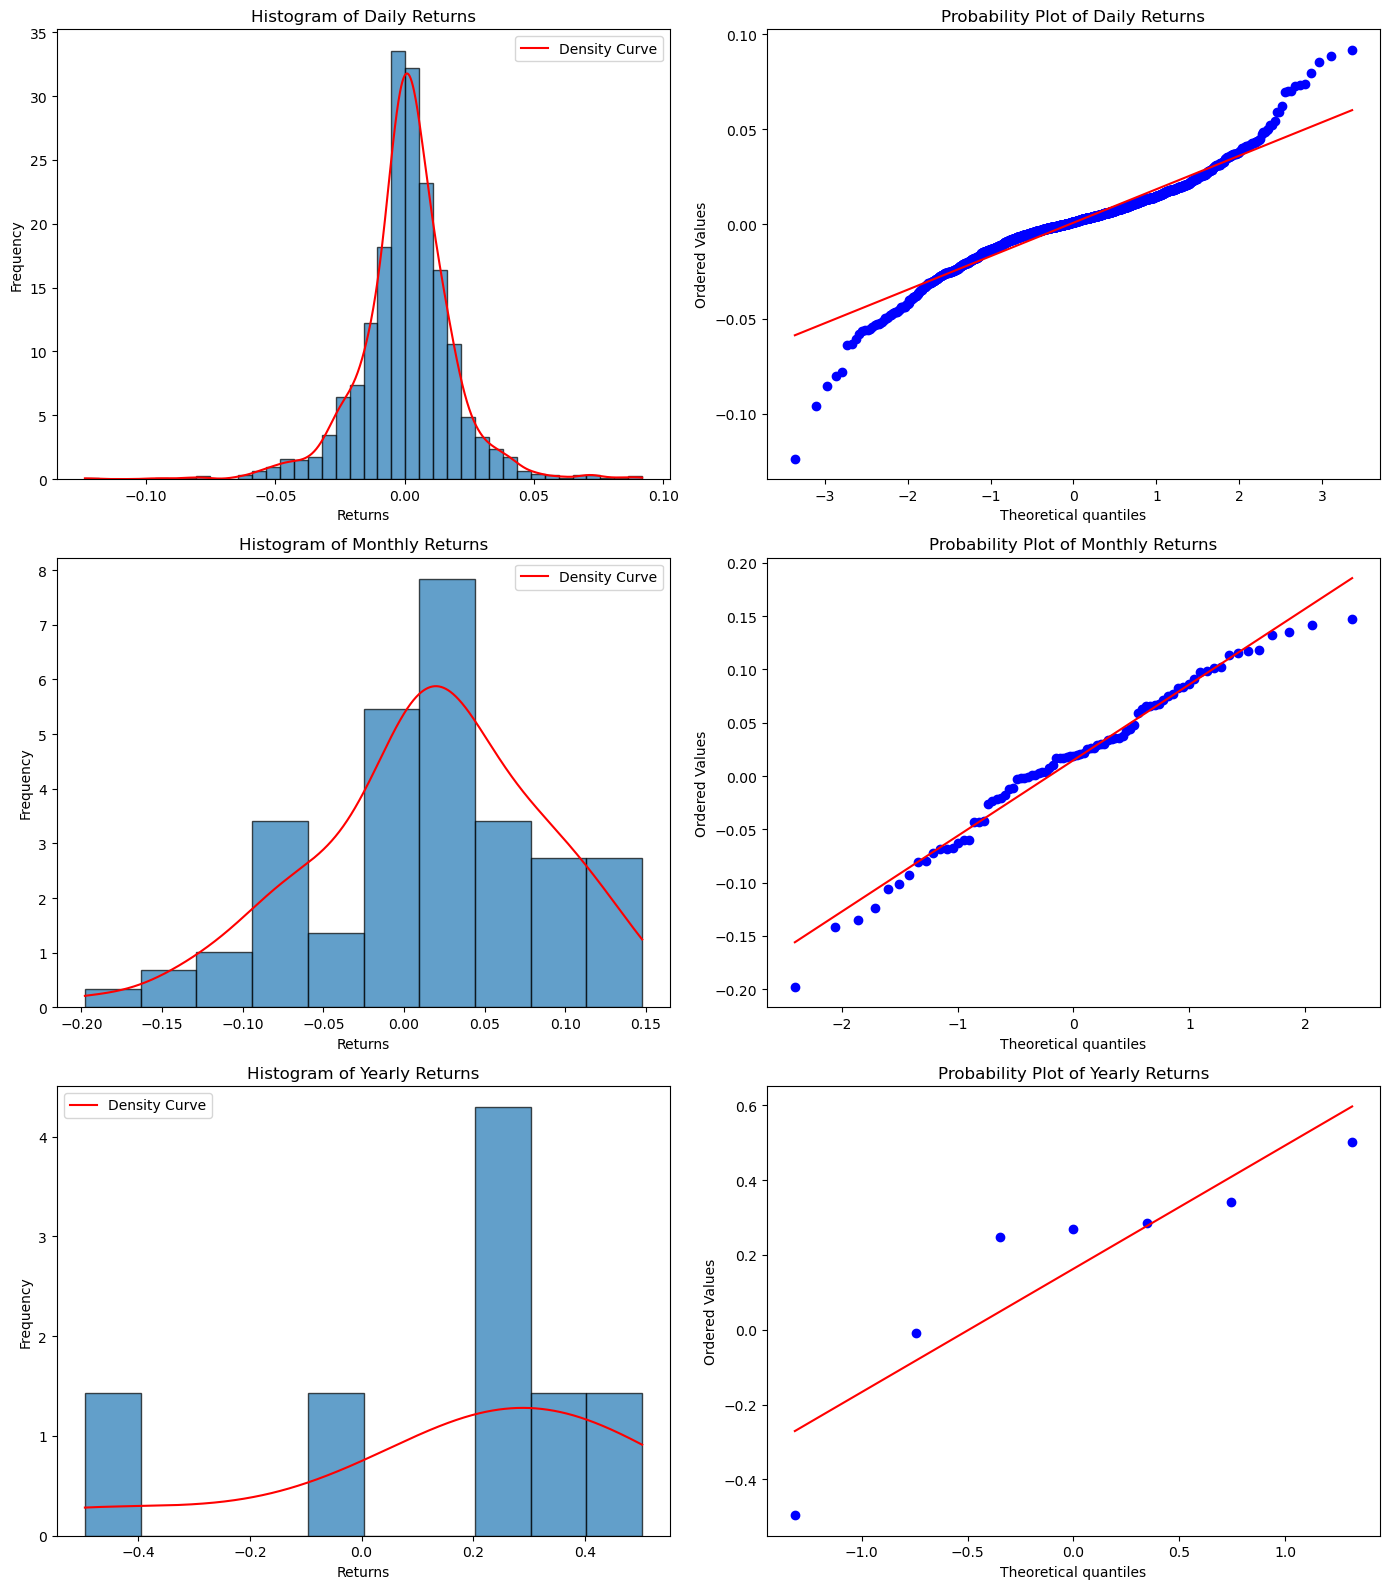

In [13]:
# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(14, 16))

# Daily returns histogram (top left)
axes[0, 0].hist(daily_returns_df, bins=40, alpha=0.7, density=True, edgecolor='black')
kde_daily = gaussian_kde(daily_returns_df.squeeze())
x_daily = np.linspace(daily_returns_df.min().item(), daily_returns_df.max().item(), 1000)
axes[0, 0].plot(x_daily, kde_daily(x_daily), color='red', label='Density Curve')
axes[0, 0].set_title("Histogram of Daily Returns")
axes[0, 0].set_xlabel("Returns")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].legend()

# Daily returns probability plot (top right)
stats.probplot(daily_returns_df.squeeze(), dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Probability Plot of Daily Returns")

# Monthly returns histogram (middle left)
axes[1, 0].hist(monthly_returns_df, alpha=0.7, density=True, edgecolor='black')
kde_monthly = gaussian_kde(monthly_returns_df.squeeze())
x_monthly = np.linspace(monthly_returns_df.min().item(), monthly_returns_df.max().item(), 1000)
axes[1, 0].plot(x_monthly, kde_monthly(x_monthly), color='red', label='Density Curve')
axes[1, 0].set_title("Histogram of Monthly Returns")
axes[1, 0].set_xlabel("Returns")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].legend()

# Monthly returns probability plot (middle right)
stats.probplot(monthly_returns_df.squeeze(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Probability Plot of Monthly Returns")

# Yearly returns histogram (bottom left)
axes[2, 0].hist(yearly_returns_df, bins=10, alpha=0.7,  density=True, edgecolor='black')
kde_yearly = gaussian_kde(yearly_returns_df.squeeze())
x_yearly = np.linspace(yearly_returns_df.min().item(), yearly_returns_df.max().item(), 1000)
axes[2, 0].plot(x_yearly, kde_yearly(x_yearly), color='red', label='Density Curve')
axes[2, 0].set_title("Histogram of Yearly Returns")
axes[2, 0].set_xlabel("Returns")
axes[2, 0].set_ylabel("Frequency")
axes[2, 0].legend()

# Yearly returns probability plot (bottom right)
stats.probplot(yearly_returns_df.squeeze(), dist="norm", plot=axes[2, 1])
axes[2, 1].set_title("Probability Plot of Yearly Returns")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [14]:
# Compute skew and kurtosis for daily DataFrame
daily_skew = daily_returns_df.apply(skew).mean()
daily_kurtosis = daily_returns_df.apply(lambda x: kurtosis(x, fisher=False)).mean()

# Compute skew and kurtosis for monthly DataFrame
monthly_skew = monthly_returns_df.apply(skew).mean()
monthly_kurtosis = monthly_returns_df.apply(lambda x: kurtosis(x, fisher=False)).mean()

# Compute skew and kurtosis for yearly DataFrame
yearly_skew = yearly_returns_df.apply(skew).mean()
yearly_kurtosis = yearly_returns_df.apply(lambda x: kurtosis(x, fisher=False)).mean()

# Create a single-row DataFrame to store the results
result_df = pd.DataFrame({
    "Daily Skewness": [daily_skew],
    "Daily Kurtosis": [daily_kurtosis],
    "Monthly Skewness": [monthly_skew],
    "Monthly Kurtosis": [monthly_kurtosis],
    "Yearly Skewness": [yearly_skew],
    "Yearly Kurtosis": [yearly_kurtosis]
    }, index=["GOOGL"])

result_df

,Daily Skewness,Daily Kurtosis,Monthly Skewness,Monthly Kurtosis,Yearly Skewness,Yearly Kurtosis
GOOGL,-0.230154,7.408253,-0.446216,3.082205,-1.243511,3.446654


---

## **Exercise 2** <a id="Exercise-2"></a>
Compute the Jarque-Bera test statistic and $p$-values for all stocks in the index over daily, monthly and annual frequencies. Summarise your results in a single graph which shows three side-by-side boxplots of the test statistic comparing: daily, monthly and annual return distributions. Comment on whether your results support the claim that stock returns exhibit aggregational Gaussianity.

### Solution
Three distinct frequencies of stock return analysis are carried out by the code below to satisfy the exercise requirements: daily, monthly, and annual. It calculates the Jarque-Bera (JB) test statistic and p-values for all stocks to examine the normalcy of their returns distribution. The JB statistic distribution over these frequencies is then visualized using side-by-side boxplots that summarize the results.

Sequence of steps followed for this exercise:
<p style="color:blue; font-weight:bold;"> 1. Calculation of Log-Returns for Different Frequencies </p>
In this step, log-returns for stock prices are calculated across different frequencies (daily, monthly, yearly) by grouping data based on the specified frequency, retaining the last value for each group, and calculating the natural logarithmic returns after resampling.
<p style="color:blue; font-weight:bold;"> 2. Application of Jarque-Bera Test Statistics and p-value with Visualization </p>
This section applies the Jarque-Bera test to assess whether the stock returns exhibit aggregational Gaussianity for the 3 different frequencies. In this section the JB statistic and p-values, are (combined) and stored in a single DataFrame. Two seperate graphs (with 3 side-by-side boxplots) have been plotted for the JB Statistic and the p-value.
<p style="color:blue; font-weight:bold;"> 3. Determining Critical Values for Specified P-Values </p>
This step involves the creation of a function that calculates the critical values corresponding to specified confidence levels (p-values) for the Jarque-Bera test.

### Step 1: Calculation of Log-Returns for Different Frequencies
Code explanation:
1. **Data Initialization**: The **data** variable is initialized as a copy of the **prices** DataFrame to maintain variable independence across exercises and avoid confusion. The 'Date' column is converted to a datetime datatype using `to_datetime()` method of pandas and set as the index of the DataFrame for efficient time-series operations.
2. **Calculation of Log-Returns**: The code calculates log-returns for prices by taking the natural log differences. Resampling for months and years is taking place as well (similarly as exercise 1). To ensure clean data, `dropna()` is used to remove rows with NaN values that result from the calculation (the first row).

In [15]:
# Copy prices DF to data
data = prices.copy()

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])  

# Set index to 'Date'
data.set_index('Date', inplace=True)

# Resample data for monthly and yearly frequency
resampled_monthly = data.resample('M').last() 
resampled_yearly = data.resample('Y').last() 

# Compute log-returns for daily, monthly, and yearly frequencies
daily_returns = np.log(data).diff().dropna()
monthly_returns = np.log(resampled_monthly).diff().dropna()
yearly_returns = np.log(resampled_yearly).diff().dropna()

### Step 2: Application of Jarque-Bera Test Statistics with Visualization
Given that we have a maximum of 1,787 daily data points and only 85 and 7 data points for the other two frequencies, we can use the `jarque_bera()` function from `scipy.stats`, as the JB test statistic may be inaccurate for sample sizes larger than 2,000. Therefore, we will need to perform a more detailed process known as a **bootstrap operation [3]**  to obtain more accurate results for the JB test statistic.

Code explanation:

1. **jb**: Computes the Jarque-Bera (JB) statistic based on sample size (n), skewness (s), and kurtosis (k) of a dataset. This formula measures deviations of a distribution from normality.

2. **jb_from_samples**: Calculates the JB statistic for an array of bootstrap samples. It also uses skew and kurtosis to determine asymmetry and tailedness of the bootstrap samples and applies the jb function to compute the statistic. Here the **fisher=False** provides the absolute kurtosis.

3. **jb_critical_value**: Computes the critical value for the JB test based on a given significance level (p) using bootstrap samples. It uses the np.percentile method to determine the threshold beyond which the null hypothesis of normality is rejected.

4. **jb_test**: Performs the Jarque-Bera test for normality using bootstrapping. Default values for the bootstrap and p-value have been defined (1000 and 0.05 respectively).
    * Steps:
    1. Generates bootstrap samples from a normal distribution based on the length of the data sample.
    2. Computes the JB critical value for the significance level by calling the `jb_critical_value(sample_size, bootstrap_samples, p)`.
    3. Computes the empirical JB statistic for the input sample by calling the `jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))`.
    4. Calculates the p_value, representing the proportion of bootstrap samples exceeding the empirical JB statistic.
    * The function returns: 
    1. Whether the null hypothesis is rejected (Boolean).
    2. Empirical JB statistic.
    3. Critical value for the test.
    4. P-value.

5. **Computation Loop**: Iterates through log-returns for daily, monthly, and yearly frequencies. Applies the jb_test function to each column (stock) of the respective DataFrame, storing results in the results dictionary.

6. **Results DataFrame (jb_results_df)**: Extracts components of the test results (reject_null, empirical_jb, critical_value, p_value) for daily, monthly, and yearly frequencies. Combines them into a single DataFrame for easier analysis and comparison.

7. **Boxplots for the JB Test Statistic**: The JB Test Statistic is presented in a subplots figure with three side-by-side box plots, allowing for easy comparison of value ranges across frequencies. Outliers are included in the visualization to highlight any deviations from the typical value ranges.

8. **Boxplots for the JB Test Statistic**: The p-value for each frequency is presented in a single grid with three side-by-side box plots, allowing for easy comparison of value ranges. Outliers are also displayed to provide additional insights of the ranges and how the outliers change over frequencies.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the box plots in terms of aggregational Gaussianity:</p>

* **Daily Returns**: The p-value boxplots suggest that daily log-returns deviate significantly from normality, with p-values well below the 5% threshold. Additionally, the Jarque-Bera (JB) Statistics Empirical value is `True` for all 98 stocks, strongly confirming that daily log-returns are not normally distributed. Therefore, we could **reject that the data exhibits aggregational Gaussianity**.

* **Monthly Returns**: For monthly log-returns, the JB Statistics Empirical value is `False` for 51 out of 98 stocks, indicating that normality cannot be excluded for these stocks. Furthermore, for many of these 51 stocks, the p-values significantly exceed the 5% threshold, suggesting closer adherence to normality compared to daily returns. Therefore, we could **not reject that the data exhibits aggregational Gaussianity**.

* **Yearly Returns**: Similar to the monthly returns, yearly log-returns mostly align with normality. Here, 90 out of 98 stocks have p-values above the 5% threshold, resulting in the JB Statistics Empirical value being `False` for the majority of stocks. This reinforces the potential normality of yearly log-returns. Therefore, we could **not reject but not approve either that the data exhibits aggregational Gaussianity**.

In conclusion, daily log-returns exhibit significant deviations from aggregational Gaussianity, with consistently low p-values and high JB statistics. Monthly and yearly log-returns demonstrate a stronger alignment with Gaussianity, closely matching the characteristics of a normal distribution as the time horizon increases. However, it is important to note that the JB test can only reject the hypothesis of normality; it cannot confirm that the distribution is truly normal [1].

In [16]:
def jb(n, s, k):
    """
    Calculate the Jarque-Bera statistic.

    Parameters:
    - n (int): Sample size.
    - s (float): Skewness of the data.
    - k (float): Kurtosis of the data.

    Returns:
    - float: Jarque-Bera statistic.
    """
    
    return  n / 6. * (s**2 + (((k - 3.)**2) / 4.))


def jb_from_samples(n, bootstrap_samples):
    """
    Calculate the Jarque-Bera statistic from bootstrap samples.

    Parameters:
    - n (int): Sample size.
    - bootstrap_samples (array): Array of bootstrap samples.

    Returns:
    - float: Jarque-Bera statistic for the bootstrap samples.
    """
    # Compute the skewness of the bootstrap samples
    s = skew(bootstrap_samples)
    
    # Compute the kurtosis of the bootstrap samples, adjusted for normality
    k = kurtosis(bootstrap_samples, fisher=False)
    
    return jb(n, s, k)


def jb_critical_value(n, bootstrap_samples, p):
    """
    Calculate the critical value for the Jarque-Bera test.

    Parameters:
    - n (int): Sample size.
    - bootstrap_samples (array): Array of bootstrap samples.
    - p (float): Significance level.

    Returns:
    - float: Critical value for the Jarque-Bera test at the given significance level.
    """
    
    return np.percentile(jb_from_samples(n, bootstrap_samples), (1. - p) * 100.)


def jb_test(data_sample, bootstrap_replications=1000, p=0.05):
    """
    Perform the Jarque-Bera test for normality using bootstrapping.

    Parameters:
    - data_sample (array): The sample data to test.
    - bootstrap_replications (int, default=1000): Number of bootstrap replications. Default is 1000.
    - p (float, default=0.05): Significance level.

    Returns:
    - tuple:
        - bool: True if the null hypothesis of normality is rejected, False otherwise.
        - float: Empirical Jarque-Bera statistic.
        - float: Critical value for the test.
    """
    # Determine the size of the data sample
    sample_size = len(data_sample)
    
    # Generate bootstrap samples from a normal distribution
    bootstrap_samples = np.random.normal(size=(sample_size, bootstrap_replications))
    
    # Compute the critical value for the given significance level
    critical_value = jb_critical_value(sample_size, bootstrap_samples, p)
    
    # Compute the skewness and kurtosis of the original data sample
    empirical_jb = jb(sample_size, skew(data_sample), kurtosis(data_sample, fisher=False))
    
    # Calculate the p_value for the empirical values
    p_value = np.mean(bootstrap_samples >= empirical_jb)
    
    return (empirical_jb > critical_value, empirical_jb, critical_value, p_value)


# Initialize an empty dictionary to store results
results = {}

# Loop through different return frequencies (daily, monthly, yearly) and their corresponding DataFrames
for label, df in [('daily', daily_returns), ('monthly', monthly_returns), ('yearly', yearly_returns)]:
    results[label] = df.apply(lambda column: jb_test(column.dropna()))

# Create a DataFrame to store the results for all frequencies
jb_results_df = pd.DataFrame({
                "Daily Reject Null": results["daily"].apply(lambda x: x[0]),
                "Daily JB Empirical Statistic": results["daily"].apply(lambda x: x[1]),
                "Daily Critical Value": results["daily"].apply(lambda x: x[2]),
                "Daily P-Value": results["daily"].apply(lambda x: x[3]),
                "Monthly Reject Null": results["monthly"].apply(lambda x: x[0]),
                "Monthly JB Empirical Statistic": results["monthly"].apply(lambda x: x[1]),
                "Monthly Critical Value": results["monthly"].apply(lambda x: x[2]),
                "Monthly P-Value": results["monthly"].apply(lambda x: x[3]),
                "Yearly Reject Null": results["yearly"].apply(lambda x: x[0]),
                "Yearly JB Empirical Statistic": results["yearly"].apply(lambda x: x[1]),
                "Yearly Critical Value": results["yearly"].apply(lambda x: x[2]),
                "Yearly P-Value": results["yearly"].apply(lambda x: x[3])
            })

# Display the final DataFrame
jb_results_df

,Daily Reject Null,Daily JB Empirical Statistic,Daily Critical Value,Daily P-Value,Monthly Reject Null,Monthly JB Empirical Statistic,Monthly Critical Value,Monthly P-Value,Yearly Reject Null,Yearly JB Empirical Statistic,Yearly Critical Value,Yearly P-Value
AAPL,True,2439.961203,5.998790,0.0,False,2.313205,5.314446,0.010435,False,0.766756,1.613855,0.231000
VZ,True,1690.154729,6.087738,0.0,False,2.311690,5.716879,0.010847,False,0.410939,1.843982,0.340857
WBA,True,3267.973441,6.162933,0.0,False,1.203438,5.335976,0.115329,False,0.922971,1.878953,0.180429
WFC,True,5534.847989,5.866165,0.0,True,18.662609,4.888865,0.000000,False,0.166364,1.852227,0.434571
WMT,True,19080.764191,6.483289,0.0,True,10.886206,5.037776,0.000000,False,0.611994,1.715495,0.275000
...,...,...,...,...,...,...,...,...,...,...,...,...
UPS,True,6892.831103,5.841502,0.0,False,1.330387,5.021955,0.090447,False,0.472806,1.848589,0.312714
USB,True,9913.894501,6.372513,0.0,True,37.140526,4.231116,0.000000,False,0.891220,1.781746,0.186143
V,True,7255.636338,5.747138,0.0,False,1.243385,5.562456,0.102047,False,0.452813,1.632572,0.338143
ABBV,True,19163.769186,5.818101,0.0,False,0.946045,5.069055,0.173271,False,0.301005,1.619141,0.381571


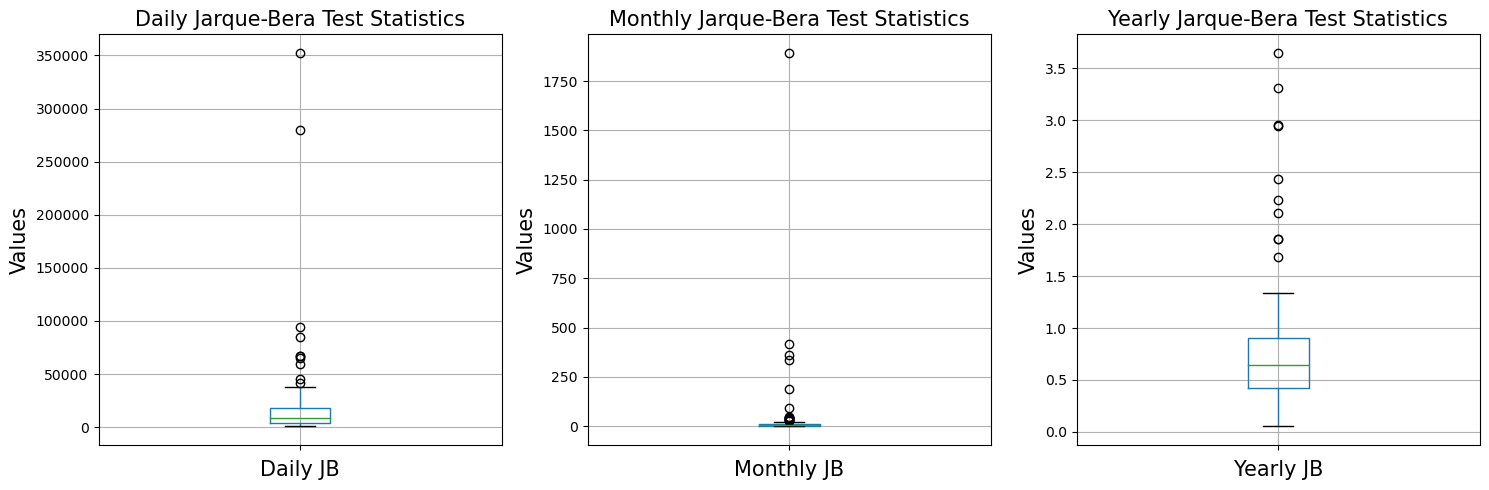

In [17]:
# Creating variables for each frequency of the JB Statistic
daily = pd.DataFrame(jb_results_df['Daily JB Empirical Statistic'])
monthly = pd.DataFrame(jb_results_df['Monthly JB Empirical Statistic'])
yearly = pd.DataFrame(jb_results_df['Yearly JB Empirical Statistic'])

# Plotting boxplots separately for each DataFrame's columns with outliers
# Adjust the figsize
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for daily
daily.boxplot(ax=axs[0])
axs[0].set_title("Daily Jarque-Bera Test Statistics", fontsize=15)
axs[0].set_xlabel("Daily JB", fontsize=15)
axs[0].set_ylabel("Values", fontsize=15)
axs[0].set_xticklabels([])

# Box plot for monthly
monthly.boxplot(ax=axs[1])
axs[1].set_title("Monthly Jarque-Bera Test Statistics", fontsize=15)
axs[1].set_xlabel("Monthly JB", fontsize=15)
axs[1].set_ylabel("Values", fontsize=15)
axs[1].set_xticklabels([])

# Box plot for annual
yearly.boxplot(ax=axs[2])
axs[2].set_title("Yearly Jarque-Bera Test Statistics", fontsize=15)
axs[2].set_xlabel("Yearly JB", fontsize=15)
axs[2].set_ylabel("Values", fontsize=15)
axs[2].set_xticklabels([])

# Make them more spacious
plt.tight_layout()
plt.show()

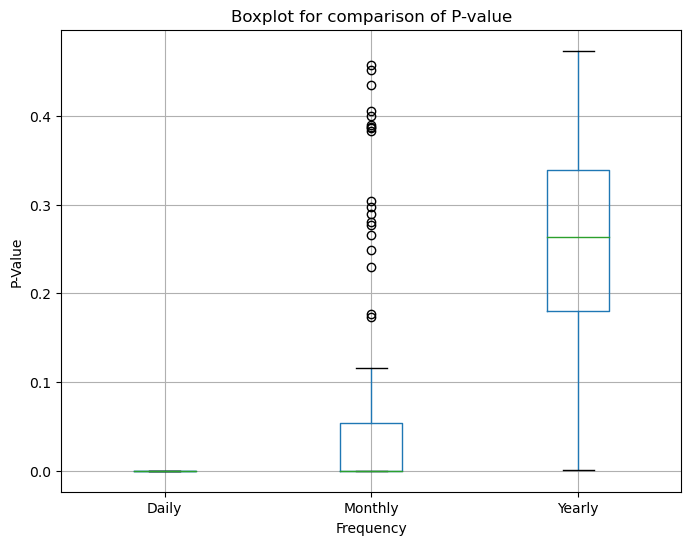

In [18]:
# Extract only the "p-value" column from each DataFrame
jb_stats = {
            'Daily': jb_results_df['Daily P-Value'],
            'Monthly': jb_results_df['Monthly P-Value'],
            'Yearly': jb_results_df['Yearly P-Value']
           }

# Combine into a single DataFrame for plotting
jb_stats_df = pd.DataFrame(jb_stats)

# Plot side-by-side boxplots
plt.figure(figsize=(8, 6))
jb_stats_df.boxplot()
plt.title("Boxplot for comparison of P-value")
plt.ylabel("P-Value")
plt.xlabel("Frequency")
plt.show()

### Step 3: Determining Critical Values for Specified P-Values

Code explanation:

1. **critical_values_for_given_p**: This function calculates **Jarque-Bera critical values** for each stock across daily, monthly, and yearly return frequencies, based on a user-defined list of p-values.
    
2. **Stock Iteration**: The function iterates over all stocks (columns) and each stock symbol is assigned into the **stock_results** ditionary. For each stock, bootstrap samples are dynamically generated from a normal distribution based on the length of the stock's data sample for each frequency.

4. **Frequency-Specific P-Values**: For each stock, the function computes frequency-specific critical values using the predefined `jb_critical_value()` function. Separate calculations are performed for daily, monthly, and yearly return data across all given significance levels (p-values).

5. **Result combined**: For each stock and p-value, the function creates three additional columns (one for each frequency). These columns are stored in the **stock_results** dictionary. After processing all stocks, the results for all stocks are combined into a single DataFrame, with columns for the stock name and its corresponding critical values across frequencies and p-values.

This function can be useful for conducting detailed statistical analysis of return distributions across multiple frequencies and stocks while customizing the confidence significance levels as needed.

In [19]:
def critical_values_for_given_p(
        sample_data_daily, 
        sample_data_monthly, 
        sample_data_yearly, 
        p_values,
        bootstrap_replications=100
    ):
    """
    Calculate critical values for the Jarque-Bera test for all stocks across daily, monthly, and yearly frequencies 
    for multiple significance levels.

    Parameters:
    - sample_data_daily (DataFrame): Daily log-returns data.
    - sample_data_monthly (DataFrame): Monthly log-returns data.
    - sample_data_yearly (DataFrame): Yearly log-returns data.
    - p_values (list of float): List of significance levels.
    - bootstrap_replications (int, default=1000): Number of bootstrap replications.

    Returns:
    - DataFrame: A combined DataFrame showing critical values for all stocks across all frequencies and p-values.
    """
    # Initialize a list to store results
    results = []
    
    # Iterate through all stocks
    for stock in sample_data_daily.columns:
        
        # Create a dictionary to store the stock's results
        stock_results = {'Stock': stock}
        
        # Generate bootstrap samples dynamically based on sample size
        bootstrap_samples_daily = np.random.normal(size=(len(sample_data_daily), bootstrap_replications))
        bootstrap_samples_monthly = np.random.normal(size=(len(sample_data_monthly), bootstrap_replications))
        bootstrap_samples_yearly = np.random.normal(size=(len(sample_data_yearly), bootstrap_replications))
        
        # Calculate critical values for each p-value for daily, monthly, and yearly frequencies
        for p in p_values:
            stock_results[f'Daily Critical Value (p={p})'] = jb_critical_value(
                                    len(sample_data_daily), bootstrap_samples_daily, p
                                    )
            stock_results[f'Monthly Critical Value (p={p})'] = jb_critical_value(
                                    len(sample_data_monthly), bootstrap_samples_monthly, p
                                    )
            stock_results[f'Yearly Critical Value (p={p})'] = jb_critical_value(
                                    len(sample_data_yearly), bootstrap_samples_yearly, p
                                    )

        # Append the stock's results to the list
        results.append(stock_results)

    # Convert results into a DataFrame
    results_df = pd.DataFrame(results)

    return results_df


# Call the function for all stocks
critical_values_df = critical_values_for_given_p(daily_returns, monthly_returns, yearly_returns,
                                                p_values=[0.01, 0.03])
critical_values_df

,Stock,Daily Critical Value (p=0.01),Monthly Critical Value (p=0.01),Yearly Critical Value (p=0.01),Daily Critical Value (p=0.03),Monthly Critical Value (p=0.03),Yearly Critical Value (p=0.03)
0,AAPL,7.397779,9.676823,2.904989,6.880166,7.285344,1.858350
1,VZ,8.804807,19.271017,3.999973,5.997141,11.761386,3.205631
2,WBA,11.724645,17.829134,2.649026,7.810419,6.961937,2.119436
3,WFC,11.848993,9.752055,3.694194,5.955535,7.250266,2.510483
4,WMT,6.807484,5.827982,2.928901,5.593419,5.107213,2.761143
...,...,...,...,...,...,...,...
93,UPS,9.079390,21.309091,1.654405,7.080917,10.930622,1.287127
94,USB,6.551132,19.837522,2.719793,5.476347,11.503389,1.289203
95,V,16.662901,6.370637,2.896181,7.051365,4.586288,2.447810
96,ABBV,10.253161,11.650624,2.318787,9.042337,5.416199,2.003652


---

## **Exercise 3** <a id="Exercise-3"></a>
Download data for the S&P 100 index (symbol `^OEX`), and repeat Exercise 1 with this data.


### Solution
The steps followed on this exercise are a repeatition of the **Exercise 1** with the only difference being that variable names and labeling are different as the `OEX` was this time analysed instead of GOOGL. Also, the index is already set as the date (by `yf`) in this case so this step can be skipped. The historical data for this stock was retrieved by the help of Yahoo's Finance Python library. Steps taken:
<p style="color:blue; font-weight:bold;"> 1. Retrieve data from Yahoo Finance </p> 
In this section we retrieve data from Yahoo Finance for the OEX. 
<p style="color:blue; font-weight:bold;"> 2. Stock Prices for Daily, Monthly, and Yearly Trends</p>
This section visualizes the OEX prices across three timeframes: daily, monthly, and yearly, using subplots for better visualization.
<p style="color:blue; font-weight:bold;"> 3. Plots of Log-Returns for Daily, Monthly, and Yearly Trends </p>
This section calculates and visualizes the daily, monthly, and yearly log-returns for OEX prices. The plots provide insights into the stock's return behavior across different timeframes, highlighting patterns and volatility.
<p style="color:blue; font-weight:bold;"> 4. Boxplots for Log-Returns of the Daily, Monthly and Yearly DataFrames </p>
Visual representation of the distribution, spread, and potential outliers in OEX's daily, monthly, and yearly log-returns.
<p style="color:blue; font-weight:bold;"> 5. Descriptive Statistics for Daily, Monthly and Yearly Log-Returns </p>
DataFrame with the summary statistics highlighting the key metrics for OEX's daily, monthly, and yearly log-returns.
<p style="color:blue; font-weight:bold;"> 6. Frequencies and Probability Plots for Daily, Monthly and Yearly Log-Returns </p>
This section visualizes the distribution of OEX's daily, monthly, and yearly log-returns through histograms and probability plots.

<p style="color:orange; font-weight:bold;"> Please note that only step's 1 code will be explained in detail as the all the other steps are just a repetition of Exercise 1 - the other 6 steps will be explained briefly.</p>

### Step 1: Retrieve data from Yahoo Finance
As per task request, in order to complete this task we will need to get some data for the OEX. To achieve that, the following steps were taken:
1. **Variable Initialisation**: For a better organised code, the symbol, and dates (start and end) variables were initialised. The dates have been selected based on the 'sap100' file so the OEX has the close prices for the same period as the other stocks. Aligning the dates is essential (for Exercise 4 as well) to ensure no missing stock prices, whether from the CSV data or the OEX, as mismatched dates would result in gaps in the data.
2. **Calling yf**: The `download()` method of `yf` was called and as parameters were passed the variables that were initialised in step 1. Please note that the start date is inclusive and the end date exclusive.
3. **Verification**: The DataFrame was called to ensure that the correct data was retrieved. Additionally, the `isnull().sum()` was called on the DataFrame to ensure that we have no null values. As observed, the Yahoo Finance retrieves several columns such as:
    * Adj Close: The adjusted closing price is the closing price after adjusting for corporate actions
    * Close: The closing price is the raw price of a stock.
    * High: The highest price at which the stock traded on that day
    * Low: The lowest price at which the stock traded on that day 
    * Open: Price of the market when the market opens.
    * Volume: Number of shares traded for that period of time (daily in our case).
4. **Extracting only 'Adj Close'**: As the data is in a multi-index format, the multi-index columns of **oex_daily** are flattened into single-level column names by joining the levels with a space (e.g., ('Adj Close', '^OEX') becomes 'Adj Close ^OEX'). The 'Adj Close ^OEX' column is selected as a Series (essential step for later where DataFrames will be created) and renamed to "Adj Close" for easier reference.
5. **Describe the data**: Descriptive statistics summary of the prices of OEX.

In [20]:
# Fetch OEX data directly using yfinance
symbol = "^OEX"

# Dates in the form of "YYYY-MM-DD". The start date is inclusive but the end date exclusive
start_date = "2016-06-06"
end_date = "2023-07-14"
oex_daily = yf.download(symbol, start=start_date, end=end_date)

# Display the data
oex_daily

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^OEX,^OEX,^OEX,^OEX,^OEX,^OEX
Date,,,,,,
2016-06-06,931.900024,931.900024,933.960022,928.179993,928.179993,3442020000
2016-06-07,932.229980,932.229980,935.739990,932.070007,932.070007,3534730000
2016-06-08,935.270020,935.270020,935.890015,932.450012,932.450012,3562060000
2016-06-09,933.580017,933.580017,934.619995,930.059998,933.849976,3290320000
2016-06-10,926.750000,926.750000,931.559998,924.039978,931.559998,3515010000
...,...,...,...,...,...,...
2023-07-07,2050.419922,2050.419922,2071.560059,2049.800049,2057.070068,3630480000
2023-07-10,2047.489990,2047.489990,2052.389893,2036.349976,2047.420044,3429600000


In [21]:
# Check for null values
oex_null_counts = oex_daily.isnull().sum()
print(oex_null_counts[oex_null_counts > 0])

# Flatten the multi-index columns
oex_daily.columns = [' '.join(col).strip() for col in oex_daily.columns]

# Select the 'Adj Close' column (now flattened)
oex_daily_series = oex_daily['Adj Close ^OEX']
oex_daily_series.name = "Adj Close"

# Descriptive statistics summary
oex_daily_series.describe()

Series([], dtype: int64)


count    1788.000000
mean     1467.394228
std       368.020310
min       887.380005
25%      1169.005035
50%      1332.149963
75%      1795.837494
max      2219.439941
Name: Adj Close, dtype: float64

### Step 2: Stock Prices for Daily, Monthly, and Yearly Trends
The code below is plotting the price of OEX in 3 different intervals (time frequencies). A figure is being created with three subplots to display the OEX prices at different frequencies: daily, monthly, and yearly. The daily prices are plotted in the first subplot using the original data, while monthly and yearly prices are computed by resampling the daily prices to the last observation of each month and year, respectively. Titles and y-axis labels are added for clarity, and `tight_layout()` ensures a clean layout before displaying the plots.

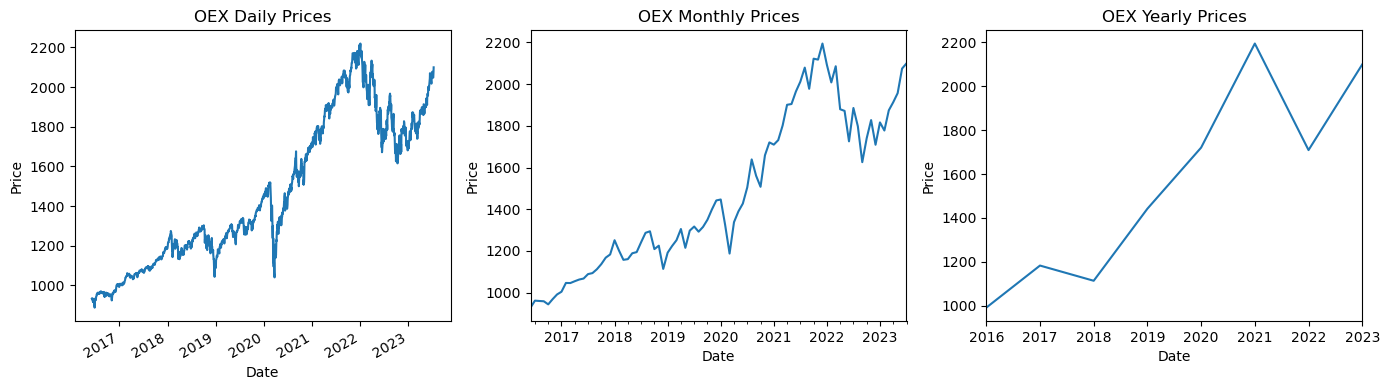

In [22]:
# Plot daily, monthly, and yearly OEX stock prices on subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot OEX daily prices (left graph)
oex_daily_series.plot(ax=axes[0], title="OEX Daily Prices")
axes[0].set_ylabel("Price")

# Plot OEX monthly prices (middle graph)
oex_monthly_prices = oex_daily_series.resample('M').last()
oex_monthly_prices.plot(ax=axes[1], title="OEX Monthly Prices")
axes[1].set_ylabel("Price")

# Plot OEX yearly prices (right graph)
oex_yearly_prices = oex_daily_series.resample('Y').last()
oex_yearly_prices.plot(ax=axes[2], title="OEX Yearly Prices")
axes[2].set_ylabel("Price")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Step 3: Plots of Log-Returns for Daily, Monthly, and Yearly Trends
The code below calculates the daily, monthly, and annual log-returns for OEX by using the nnatural logarithm of the price ratios over consecutive periods. The daily log-returns are plotted in the top subplot, and the monthly and annual log-returns are plotted in two subplots below. These log-returns are saved in different DataFrames and displayed in subplots. To enhance clarity, titles, labels, and legends are added, and before the plots are displayed, `tight_layout()` makes sure the layout is tidy.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;">Observations from the Log-Return plots: </p>
Extreme volatility can be seen in the daily log-returns after the first quarter of 2020 until 2021, which is probably a reflection of the influence of major world events like the COVID-19 epidemic. The monthly returns exhibit smoother fluctuations and intermediate trends, making them less unpredictable. On the yearly scale, the log-returns highlight clear aggregate trends, with noticeable peaks and troughs, reflecting the broader market movements over time.

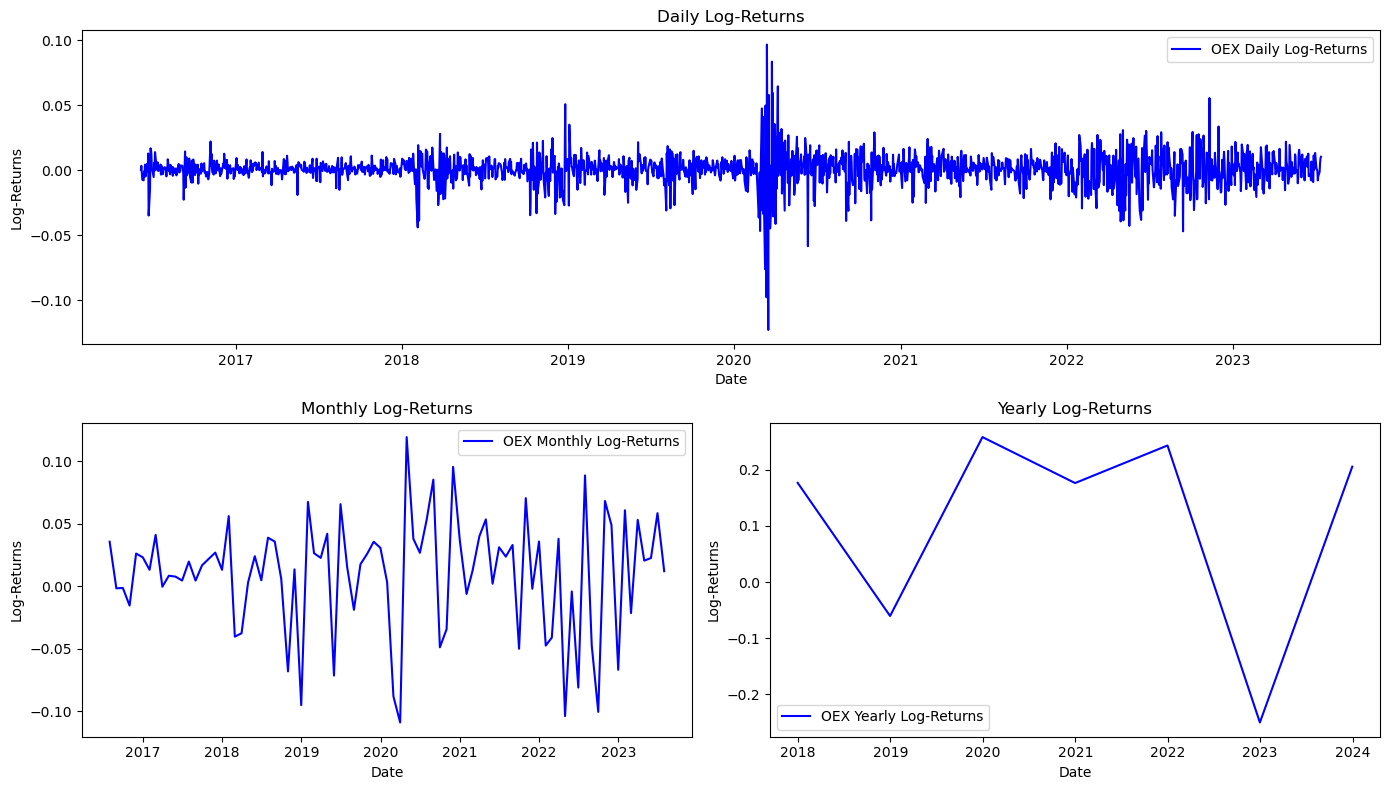

In [23]:
# Calculate daily, monthly, and yearly log-returns for OEX
oex_daily_returns = np.diff(np.log(oex_daily_series))
oex_monthly_returns = np.diff(np.log(oex_monthly_prices))
oex_yearly_returns = np.diff(np.log(oex_yearly_prices))

# Convert the returns to DataFrames
oex_daily_returns_df = pd.DataFrame({'OEX daily log returns': oex_daily_returns}, index=oex_daily_series.index[1:])
oex_monthly_returns_df = pd.DataFrame({'OEX monthly log returns': oex_monthly_returns}, index=oex_monthly_prices.index[1:])
oex_yearly_returns_df = pd.DataFrame({'OEX yearly log returns': oex_yearly_returns}, index=oex_yearly_prices.index[1:])

# Set the figure size and create subplots for each log return (daily, monthly and yearly)
fig = plt.figure(figsize=(14, 8))

# Daily log-returns (top plot)
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(oex_daily_returns_df, label="OEX Daily Log-Returns", color='blue')
ax1.set_title("Daily Log-Returns")
ax1.set_xlabel("Date")
ax1.set_ylabel("Log-Returns")
ax1.legend()

# Monthly log-returns (bottom left plot) 
ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(oex_monthly_returns_df, label="OEX Monthly Log-Returns", color='blue')
ax2.set_title("Monthly Log-Returns")
ax2.set_xlabel("Date")
ax2.set_ylabel("Log-Returns")
ax2.legend()

# Yearly log-returns (bottom right plot) 
ax3 = fig.add_subplot(2, 2, 4)
ax3.plot(oex_yearly_returns_df, label="OEX Yearly Log-Returns", color='blue')
ax3.set_title("Yearly Log-Returns")
ax3.set_xlabel("Date")
ax3.set_ylabel("Log-Returns")
ax3.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Step 4: Boxplots for Log-Returns of the Daily, Monthly and Yearly DataFrames
This code summarizes the distributions of OEX daily, monthly, and annual log-returns into a single-row figure with three boxplots. A visual representation of the spread (range), mean, and outliers for a given frequency is given by each boxplot. The first column displays the daily boxplot, followed by the monthly and annual ones. For clarity, titles and y-axis labels are provided, and `tight_layout()` makes sure the plots are arranged neatly and do not overlap.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the boxplot in terms of the distribution of the data: </p> 

1. **mean** 
    * daily &rarr; 0.00
    * monthly &rarr; 0.02
    * annually &rarr; 0.18
2. **approximate range**: 
    * daily &rarr; between -0.02 and 0.02 with most of the log returns being between -0.005 and 0.005
    * monthly &rarr; between -0.05 and 0.10 with most of the log returns being between 0.00 and 0.04 
    * annually &rarr; between -0.05 and 0.28 with most of the log returns being between 0.06 and 0.22
3. **outliers**: 
    * daily &rarr; many outliers above and below the approximate range
    * monthly &rarr; a single outlier around on above the upper bound (range) and multiple below the lower bound.
    * annually &rarr; a single outlier around -0.28

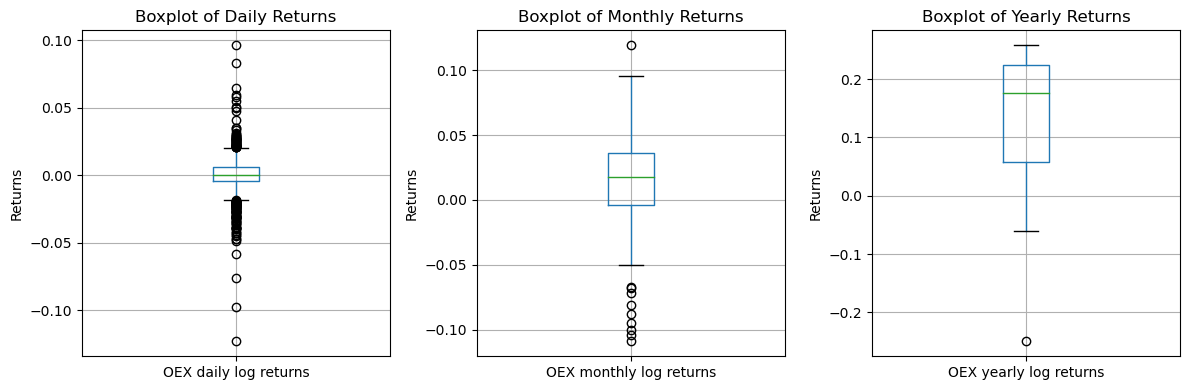

In [24]:
# Create a figure with 1 row and 3 columns for subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Boxplot for daily returns
oex_daily_returns_df.boxplot(ax=axes[0])
axes[0].set_title("Boxplot of Daily Returns")
axes[0].set_ylabel("Returns")

# Boxplot for monthly returns
oex_monthly_returns_df.boxplot(ax=axes[1])
axes[1].set_title("Boxplot of Monthly Returns")
axes[1].set_ylabel("Returns")

# Boxplot for yearly returns
oex_yearly_returns_df.boxplot(ax=axes[2])
axes[2].set_title("Boxplot of Yearly Returns")
axes[2].set_ylabel("Returns")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Step 5: Descriptive Statistics for Daily, Monthly and Yearly Log-Returns
This code computes and combines the descriptive statistics for daily, monthly, and yearly log-returns. Having this, it is easy to review the daily, monthly and yearly statistics for the log-returns of 'OEX'.

In [25]:
# Display all descriptive statistics
oex_daily_stats = oex_daily_returns_df.describe()
oex_monthly_stats = oex_monthly_returns_df.describe()
oex_yearly_stats = oex_yearly_returns_df.describe()

# Combine all descriptive statistics into a single DataFrame
oex_combined_stats = pd.concat([oex_daily_stats, oex_monthly_stats, oex_yearly_stats], axis=1,)

# Display the combined DataFrame
oex_combined_stats

,OEX daily log returns,OEX monthly log returns,OEX yearly log returns
count,1787.000000,85.000000,7.000000
mean,0.000455,0.009603,0.107183
std,0.012248,0.047004,0.189896
min,-0.122946,-0.109149,-0.249983
25%,-0.003803,-0.004244,0.058063
50%,0.000569,0.017541,0.176787
75%,0.005974,0.036539,0.224522
max,0.096464,0.119358,0.258309


### Step 6: Frequencies and Probability Plots for Daily, Monthly and Yearly Log-Returns
To examine the distributions of daily, monthly, and annual OEX log-returns, the code below generates a 3x2 grid of subplots. Each row represents a frequency (left plot), and probability plots (right plot) are displayed to evaluate normality (how close are the returns to the qq-line), while histograms with density curves are displayed in the histograms. The density curves (using `gaussian_kde`) offer smooth approximations, and the histograms show the return distributions. The plots are customized for easier readability of the visualizatiosn (a few parameters default values of parameters have been changed such as alpha, bin, density and edgecolor). Theoretical normal quantiles are contrasted in the probability plots too to compare the empirical quantiles against the quantiles of a normal theoretical distribution. For clarity, titles, labels, and legends are added, and `tight_layout()` guarantees no overlapping between the plots.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;">Observations from the histograms and probability plots in terms of whether the returns are normally distributed:</p>

* **Daily** &rarr; When histograms and kernel density estimates (KDE) are used to visualize the data, the distributions seem to follow a symmetric, normal pattern thus the log-returns based on the histogram only could be a normaly distribution. While histogram shows that the data might be normally distributed, high deviations are seen in the 1st and 4rth quartiles, where dots are quite far from the Q-Q line which indicate that the log returns are **not normally distributed** as the data is skewed.
* **Monthly** &rarr; For the monthly log-returns data, the Q-Q plot shows data points that closely align with the Q-Q line, with a few deviations, suggesting that this could be a normal distribution however the histogram and its KDE **do not indicate to a normal distribution**, as the curve and the histogram overal is asymmetric and exhibits fatter tails compared to the daily returns, indicating a higher likelihood of extreme log-returns occurring.
* **Annually** &rarr; In terms of the yearly log-returns data, the limited sample size of just seven observations makes it challenging to draw definitive conclusions. The data points on the Q-Q plot generally do not align closely with the Q-Q line, suggesting that the log-returns are **not normally distributed**. Additionally, the histogram indicates a left-skewed distribution with signs of polykurtosis.

Skew and Kurtosis have been computed as well to confirm that the above observations are accurate, especially for the daily log returns where the histogram seems like a normal distribution. In this case, the skew and kurtosis for the daily log returns are -0.725887 and 17.333454 respectively which confirm that the daily data is does not follow a normal distribution.

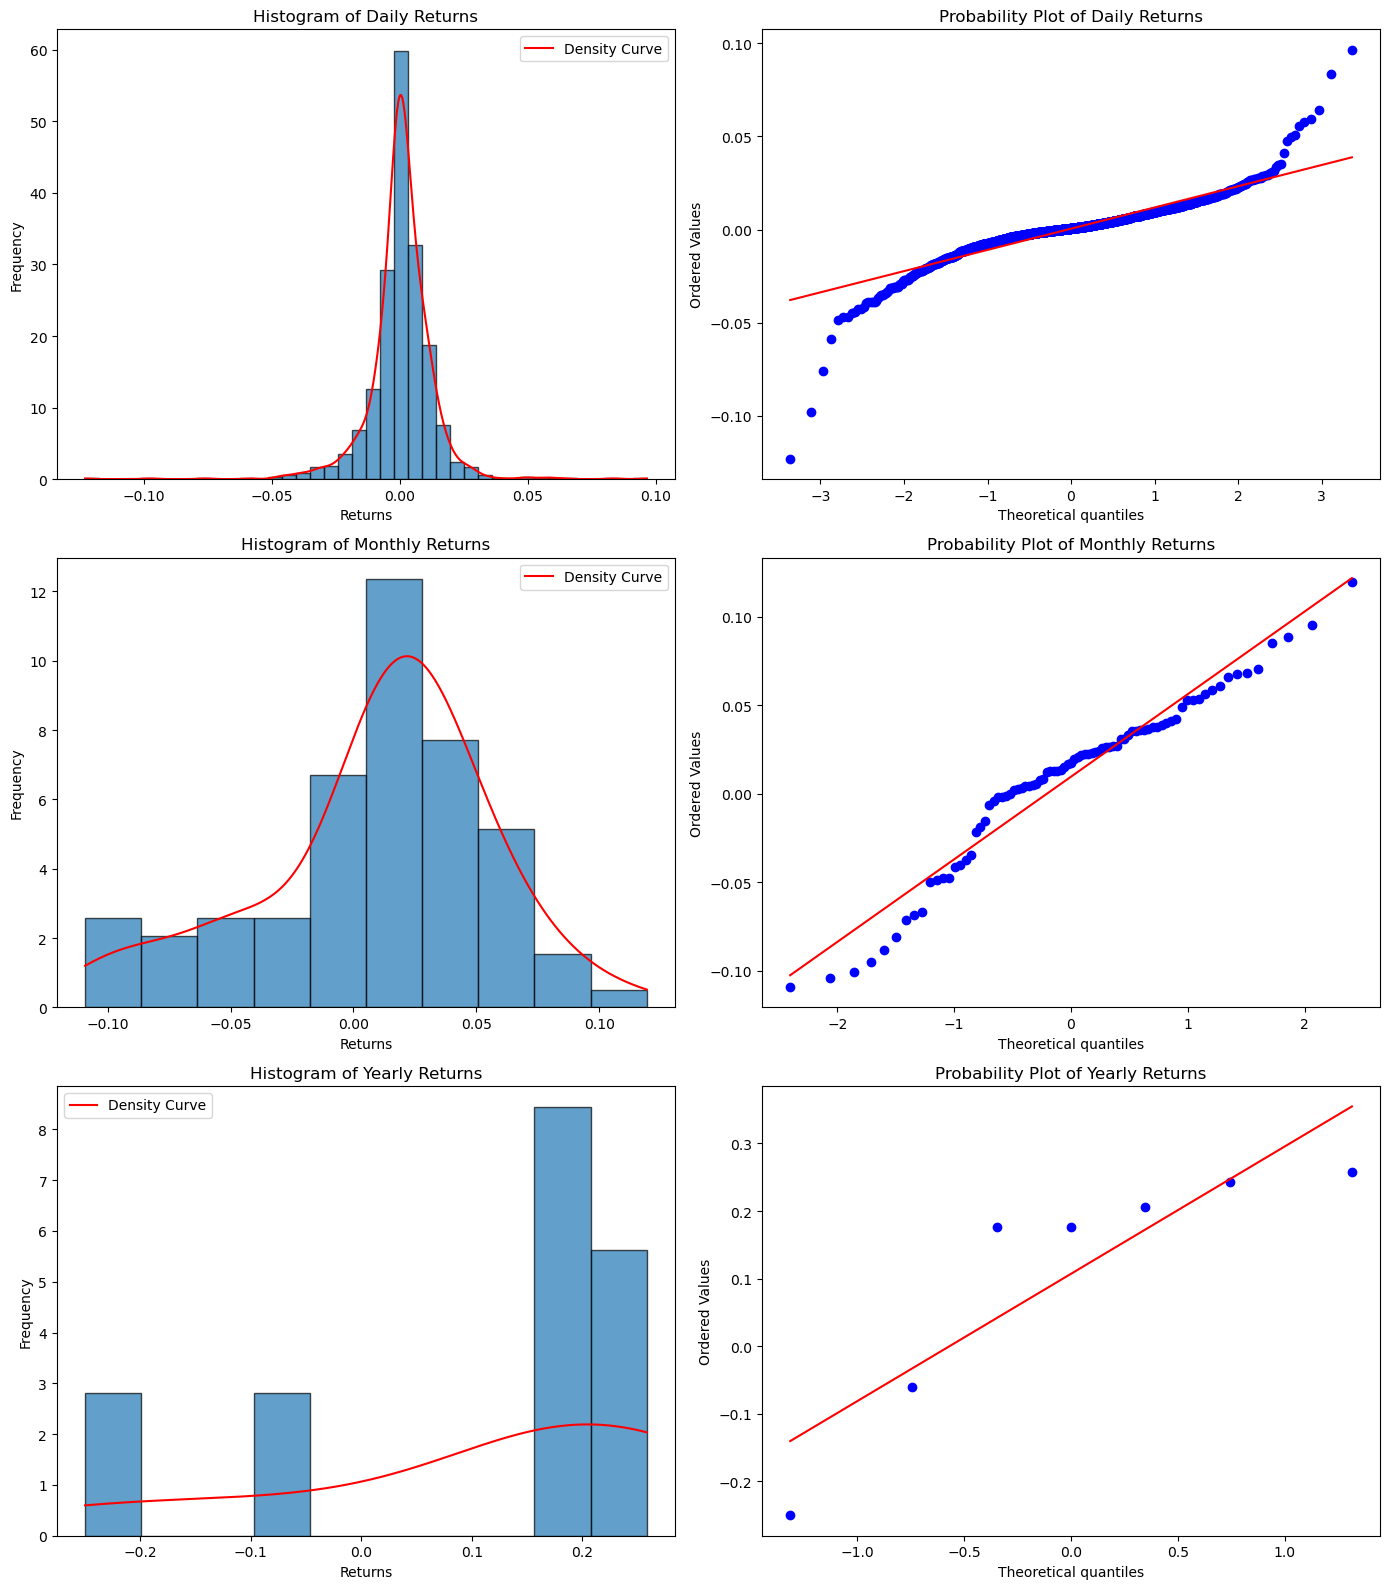

In [26]:
# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(14, 16))

# Daily returns histogram (top left)
axes[0, 0].hist(oex_daily_returns_df, bins=40, alpha=0.7, density=True, edgecolor='black')
kde_daily = gaussian_kde(oex_daily_returns_df.squeeze())
x_daily = np.linspace(oex_daily_returns_df.min().item(), oex_daily_returns_df.max().item(), 1000)
axes[0, 0].plot(x_daily, kde_daily(x_daily), color='red', label='Density Curve')
axes[0, 0].set_title("Histogram of Daily Returns")
axes[0, 0].set_xlabel("Returns")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].legend()

# Daily returns probability plot (top right)
stats.probplot(oex_daily_returns_df.squeeze(), dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Probability Plot of Daily Returns")

# Monthly returns histogram (middle left)
axes[1, 0].hist(oex_monthly_returns_df, alpha=0.7, density=True, edgecolor='black')
kde_monthly = gaussian_kde(oex_monthly_returns_df.squeeze())
x_monthly = np.linspace(oex_monthly_returns_df.min().item(), oex_monthly_returns_df.max().item(), 1000)
axes[1, 0].plot(x_monthly, kde_monthly(x_monthly), color='red', label='Density Curve')
axes[1, 0].set_title("Histogram of Monthly Returns")
axes[1, 0].set_xlabel("Returns")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].legend()

# Monthly returns probability plot (middle right)
stats.probplot(oex_monthly_returns_df.squeeze(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Probability Plot of Monthly Returns")

# Yearly returns histogram (bottom left)
axes[2, 0].hist(oex_yearly_returns_df, bins=10, alpha=0.7,  density=True, edgecolor='black')
kde_yearly = gaussian_kde(oex_yearly_returns_df.squeeze())
x_yearly = np.linspace(oex_yearly_returns_df.min().item(), oex_yearly_returns_df.max().item(), 1000)
axes[2, 0].plot(x_yearly, kde_yearly(x_yearly), color='red', label='Density Curve')
axes[2, 0].set_title("Histogram of Yearly Returns")
axes[2, 0].set_xlabel("Returns")
axes[2, 0].set_ylabel("Frequency")
axes[2, 0].legend()

# Yearly returns probability plot (bottom right)
stats.probplot(oex_yearly_returns_df.squeeze(), dist="norm", plot=axes[2, 1])
axes[2, 1].set_title("Probability Plot of Yearly Returns")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [27]:
# Compute skewness and kurtosis for daily, monthly, and yearly returns
oex_daily_skew = oex_daily_returns_df.apply(skew).mean()
oex_daily_kurtosis = oex_daily_returns_df.apply(lambda x: kurtosis(x, fisher=False)).mean()

oex_monthly_skew = oex_monthly_returns_df.apply(skew).mean()
oex_monthly_kurtosis = monthly_returns_df.apply(lambda x: kurtosis(x, fisher=False)).mean()

oex_yearly_skew = oex_yearly_returns_df.apply(skew).mean()
oex_yearly_kurtosis = yearly_returns_df.apply(lambda x: kurtosis(x, fisher=False)).mean()

# Create a single-row DataFrame to store the results
oex_result_df = pd.DataFrame({
    "Daily Skewness": [oex_daily_skew],
    "Daily Kurtosis": [oex_daily_kurtosis],
    "Monthly Skewness": [oex_monthly_skew],
    "Monthly Kurtosis": [oex_monthly_kurtosis],
    "Yearly Skewness": [oex_yearly_skew],
    "Yearly Kurtosis": [oex_yearly_kurtosis]
}, index=["Skewness and Kurtosis"])

oex_result_df

,Daily Skewness,Daily Kurtosis,Monthly Skewness,Monthly Kurtosis,Yearly Skewness,Yearly Kurtosis
Skewness and Kurtosis,-0.725887,17.333454,-0.626595,3.082205,-1.12153,3.446654


---

## **Exercise 4** <a id="Exercise-4"></a>
Estimate the $α$ and $β$ of each stock according to the single-index model using ordinary least squares regression over monthly excess returns, storing your results in a DataFrame. Produce a single graph showing side-by-side boxplots summarising the distribution of the alpha and beta coefficients over all stocks in the index.


### Solution
The main goal of this exercise is to perform an Ordinary Least Squares (OLS) regression for each stock to estimate the alpha and beta (also the r-squared, p-value and std-error) coefficients under the single-index model using monthly excess returns. The results were stored in a DataFrame for further analysis. Finally, the distribution of alpha and beta coefficients was visualized using side-by-side boxplots to summarize the results as per exercise's requirements. Steps taken:

<p style="color:blue; font-weight:bold;"> 1. Preparing the Index Data </p> 
Creation of dataframe that will be used for this exercise, ensuring all numbers are numeric, obtain monthly data (with their last date of month prices), calculate log returns, and convert them to simple returns for later use.
<p style="color:blue; font-weight:bold;"> 2. Correlation and Covariance of Simple Returns </p>
Reviewing of simple returns relationship between 2 stocks, calculate the correlation of all stocks and compute the covariance of all stocks. 
<p style="color:blue; font-weight:bold;"> 3. Prepare the Risk-Free Rate Data </p>
Import and preprocess realistic financial risk-free rate data for the computation of excess returns.
<p style="color:blue; font-weight:bold;"> 4. Single-Index Regression </p> 

Excess returns for index and estimation of Alpha, Beta, R-Squared, P-Value, and Std-Error for all stock (monthly) simple returns by using `linregress(x,y)` from `stats` library.
<p style="color:blue; font-weight:bold;"> 5. Visualizing the Results with Boxplots </p>
Produce a single graph showing side-by-side boxplots summarising the distribution of the alpha and beta coefficients over all stocks in the index.
<p style="color:blue; font-weight:bold;"> 6. Single-Stock Regression with OLS </p>
Single-Stock Regression with OLS and OLS Regression results to compare 'GOOGL' with the market index.

### Step 1: Preparing the Index Data
Initially, the prices is copied to another variable (DataFrame) named **data_for_ols** and this is to not confuse prior variables with this task. Afterwards, the Date is being convert column to a datetime format and set it as the index of the dataset to handle time-series data more efficiently as the inplace is set to true which allows you to save the change on the DF without the need of saving it to a new variable. Monthly data is obtained by resampling the daily prices and taking the last value of each month. The log-returns are calculated using the natural logarithm of price ratios (`np.log()`), and any missing values are dropped to prevent errors later on. These log-returns are saving into a DataFrame and afterwards an 'index' column has been created in the DataFrame, passing the **oex_monthly_returns_df** as the values of the column which is actually the log return for the index (OEX). Finally, the log-returns are converted into simple returns using the formula `np.exp(log_returns) - 1`.

In [28]:
# Copy prices to a new DataFrame
data_for_ols = prices.copy()

# Convert 'Date' column to datetime
data_for_ols['Date'] = pd.to_datetime(data_for_ols['Date'])

# Set index to 'Date'
data_for_ols.set_index('Date', inplace=True)

# Obtain monthly data by resampling
monthly_data = data_for_ols.resample('M').last()

# Calculate log returns and drop NaN values
log_returns = np.log(monthly_data).diff().dropna()

# Convert log_returns to a DataFrame (if needed)
log_returns_df = pd.DataFrame(log_returns, columns=monthly_data.columns)

# Index (OEX) monthly returns added as a last column on the DF
log_returns_df['index'] = oex_monthly_returns_df

# Convert Log-Returns to Simple-Returns
simple_returns_df = np.exp(log_returns_df) - 1.

### Step 2: Correlation and Covariance of Simple Returns
Initialy to verify that the data is in a log format, the relationship of the stock chosen from Exercise 1 with the index ('GOOGL' and 'OEX') have been plotted by a scatter plot with a figure size of 6 and 3 (width, height).

Afterwards, the `corr()` and `cov()` methods are invoked on the **simple_returns_df** dataframe which is a result of step 1. These are statistical tools and are used for analysis purposes to review the measurement of relationship between variables. The **correlation** measures the strngth and direction of the relationship between 2 stock simple returns while the **covariance** measures the direction of the relationship between 2 stock simple returns. 

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;">Observation from the plot and the correlation: </p>
The simple returns of GOOGL and the index (OEX) appear to follow a linear pattern, as higher OEX simple returns often correspond to relatively higher GOOGL simple returns and similarly for low returns. This relationship is further supported by the strong correlation between the two assets, approximately 0.745. Also, as noticed the correlation of the stock return with it selft it is 1 (maximum) while correlation returns between 2 different stocks, differs.

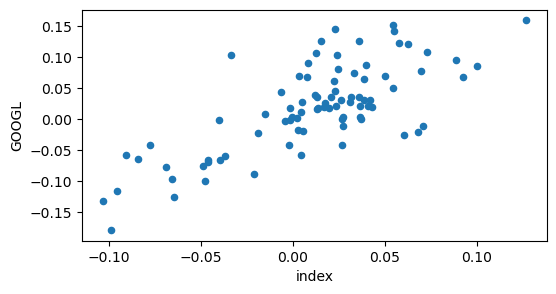

,GOOGL,index
GOOGL,1.000000,0.745393
index,0.745393,1.000000


In [29]:
# Relationship between 2 stock returns
simple_returns_df.plot(x='index', y='GOOGL', kind='scatter', figsize=(6, 3))
# Display plot
plt.show()

simple_returns_df[['GOOGL', 'index']].corr()

In [30]:
# Correlation of the simple returns dataframe
simple_returns_df.corr().head()

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN,index
AAPL,1.000000,0.132353,0.160254,0.230302,0.381540,0.233818,0.376735,0.644431,0.119944,0.301062,...,0.562796,0.491100,0.287732,0.397042,0.382396,0.198678,0.546411,0.085823,0.623230,0.741407
VZ,0.132353,1.000000,0.295540,0.298751,0.316317,0.331146,0.374757,0.153057,0.139835,0.368812,...,0.089225,0.215969,0.249146,0.257950,0.412643,0.341879,0.369418,0.226509,0.308192,0.373821
WBA,0.160254,0.295540,1.000000,0.380871,0.314481,0.372520,0.384527,0.110777,0.235581,0.459399,...,0.025316,0.211106,0.341524,0.280296,0.364348,0.364028,0.202028,0.206712,0.325324,0.383358
WFC,0.230302,0.298751,0.380871,1.000000,0.200268,0.661477,0.157256,0.235931,0.600946,0.253499,...,0.233227,0.399523,0.331244,0.466074,0.378846,0.793669,0.482432,0.283936,0.400369,0.567823
WMT,0.381540,0.316317,0.314481,0.200268,1.000000,0.183485,0.340203,0.290763,0.188401,0.232716,...,0.256632,0.308170,0.402090,0.356535,0.432716,0.142123,0.362860,0.096558,0.452518,0.504936


In [31]:
# Covariance of the simple returns dataframe
simple_returns_df.cov().head()

,AAPL,VZ,WBA,WFC,WMT,XOM,ABT,ADBE,AIG,AMGN,...,TSLA,TXN,UNH,UNP,UPS,USB,V,ABBV,ACN,index
AAPL,0.006988,0.000540,0.001081,0.001730,0.001717,0.001727,0.001800,0.004632,0.000925,0.001729,...,0.009175,0.002686,0.001476,0.002288,0.002638,0.001286,0.002812,0.000566,0.003483,0.002903
VZ,0.000540,0.002384,0.001165,0.001311,0.000831,0.001429,0.001046,0.000643,0.000630,0.001237,...,0.000850,0.000690,0.000746,0.000868,0.001663,0.001292,0.001111,0.000872,0.001006,0.000855
WBA,0.001081,0.001165,0.006512,0.002761,0.001366,0.002657,0.001774,0.000769,0.001754,0.002547,...,0.000398,0.001115,0.001691,0.001559,0.002426,0.002274,0.001004,0.001315,0.001755,0.001449
WFC,0.001730,0.001311,0.002761,0.008072,0.000968,0.005252,0.000808,0.001823,0.004982,0.001565,...,0.004086,0.002348,0.001826,0.002886,0.002808,0.005519,0.002668,0.002011,0.002405,0.002390
WMT,0.001717,0.000831,0.001366,0.000968,0.002897,0.000873,0.001047,0.001346,0.000936,0.000861,...,0.002694,0.001085,0.001328,0.001323,0.001922,0.000592,0.001202,0.000410,0.001629,0.001273


### Step 3: Prepare the Risk-Free Rate Data
In this section, data from the Federal Funds Effective Rate - FRED **[4]** has been downloaded to my computer and imported as a variable in a month format for the specific period as the OEX data. 

Code Exaplanation:
1. **Defining a Multiline String as Input Data**: The **rr_data** variable has been created (similar to CSV format) and a value a multiline string has been assigned with the 'Date' and 'Interest Rate (%)' from the 1/07/2016 until 1/07/2023.

2. **Reading the Data into a DataFrame**: The `pd.read_csv(StringIO(rr_data))` reads the multiline string into a pandas DataFrame (**rr_data_df**) by simulating it as a file using `StringIO`.

3. **Ensuring the Date Column is in Datetime Format**: `pd.to_datetime(rr_data_df["Date"])` is utilized to convert the `Date` column into a proper datetime format, ensuring compatibility for date-based operations.

4. **Converting the Interest Rate to Decimal Form**: By dividing `Interest Rate (%)` by 100, I convert the percentage values into decimal form for accurate calculations in subsequent operations.

This setup prepares the **rr_data_df** DataFrame for further analysis or calculations involving dates and interest rates. Thus, the DataFrame length matches the simple returns of the OEX, with aligned months, enabling easy computations between the values of their columns. 

In [32]:
# Add the interest rate data as a variable
rr_data = """Date,Interest Rate (%)
            01/07/2016,0.39
            01/08/2016,0.4
            01/09/2016,0.4
            01/10/2016,0.4
            01/11/2016,0.41
            01/12/2016,0.54
            01/01/2017,0.65
            01/02/2017,0.66
            01/03/2017,0.79
            01/04/2017,0.9
            01/05/2017,0.91
            01/06/2017,1.04
            01/07/2017,1.15
            01/08/2017,1.16
            01/09/2017,1.15
            01/10/2017,1.15
            01/11/2017,1.16
            01/12/2017,1.3
            01/01/2018,1.41
            01/02/2018,1.42
            01/03/2018,1.51
            01/04/2018,1.69
            01/05/2018,1.7
            01/06/2018,1.82
            01/07/2018,1.91
            01/08/2018,1.91
            01/09/2018,1.95
            01/10/2018,2.19
            01/11/2018,2.2
            01/12/2018,2.27
            01/01/2019,2.4
            01/02/2019,2.4
            01/03/2019,2.41
            01/04/2019,2.42
            01/05/2019,2.39
            01/06/2019,2.38
            01/07/2019,2.4
            01/08/2019,2.13
            01/09/2019,2.04
            01/10/2019,1.83
            01/11/2019,1.55
            01/12/2019,1.55
            01/01/2020,1.55
            01/02/2020,1.58
            01/03/2020,0.65
            01/04/2020,0.05
            01/05/2020,0.05
            01/06/2020,0.08
            01/07/2020,0.09
            01/08/2020,0.1
            01/09/2020,0.09
            01/10/2020,0.09
            01/11/2020,0.09
            01/12/2020,0.09
            01/01/2021,0.09
            01/02/2021,0.08
            01/03/2021,0.07
            01/04/2021,0.07
            01/05/2021,0.06
            01/06/2021,0.08
            01/07/2021,0.1
            01/08/2021,0.09
            01/09/2021,0.08
            01/10/2021,0.08
            01/11/2021,0.08
            01/12/2021,0.08
            01/01/2022,0.08
            01/02/2022,0.08
            01/03/2022,0.2
            01/04/2022,0.33
            01/05/2022,0.77
            01/06/2022,1.21
            01/07/2022,1.68
            01/08/2022,2.33
            01/09/2022,2.56
            01/10/2022,3.08
            01/11/2022,3.78
            01/12/2022,4.1
            01/01/2023,4.33
            01/02/2023,4.57
            01/03/2023,4.65
            01/04/2023,4.83
            01/05/2023,5.06
            01/06/2023,5.08
            01/07/2023,5.12
            """

# Read the data with pandas
rr_data_df = pd.read_csv(StringIO(rr_data))

# Ensure the Date columns in both DataFrames are in datetime format
rr_data_df["Date"] = pd.to_datetime(rr_data_df["Date"])

# Divide by 100 to get it on the correct form for the excess returns calculations
rr_data_df["Interest Rate (%)"] = rr_data_df["Interest Rate (%)"] / 100

### Step 4: Single-Index Regression
In this section, the `linregress` from the stats library is being utilised to compute the $a$, $β$, $R^2$, $p{-value}$ and $σ_β$.

Code Exaplanation:
1. The **excess return for the index** is calculated by subtracting the monthly equivalent interest rate (**Interest Rate /12**) from the simple returns of the index. Please note that the computation of the risk-free rate is discrete (not compounding) for 
2. **Initilise an empty list** where results will be appended.
3. Make the **use of a for loop** that iterates through the 1st (in the 0 index) column of the DataFrame until the last one which is **excluded** as it is the 'index' column which we have already computed above.
    * for each stock calculate the excess returns (similarly as I already did above for the index).
    * on each iteration make the use of the `stats.linregress(x,y)` passing the index excess returns as a value for the x paramater and the stock for the value of the y parameter.
    * save the results from the above step in the following variables **beta, alpha, rvalue, pvalue, stderr**
    * append all the above variables on the empty list at the end of each iteration
4. As we now have a list of dictionaries, we can convert this to a **DataFrame**.
5. **Display the results** (DataFrame).

In [33]:
# Excess returns for index 
xdata = simple_returns_df["index"] - (rr_data_df["Interest Rate (%)"].values / 12)

# Create an empty list to store results
regression_results = []

# Loop through each stock column (excluding the index column which is located last)
for stock in simple_returns_df.columns[:-1]:
    
    # Excess returns for the specific stock
    ydata = simple_returns_df[stock] - (rr_data_df["Interest Rate (%)"].values / 12)

    # Perform linear regression
    beta, alpha, rvalue, pvalue, stderr = stats.linregress(x=xdata, y=ydata)

    # Append results to the list
    regression_results.append({
                                "Stock": stock,
                                "Alpha": alpha,
                                "Beta": beta,
                                "R-Squared": rvalue**2,
                                "P-Value": pvalue,
                                "Std-Error": stderr
                             })

# Convert the results to a DataFrame
regression_results_df = pd.DataFrame(regression_results)

# Display the alpha, beta, r-squared, p-value, std-error of the monthly simple returns of each stock
regression_results_df

,Stock,Alpha,Beta,R-Squared,P-Value,Std-Error
0,AAPL,0.014301,1.325071,0.550815,4.386798e-16,0.131344
1,VZ,-0.009350,0.391097,0.140499,4.087167e-04,0.106178
2,WBA,-0.016392,0.664265,0.148367,2.724689e-04,0.174687
3,WFC,-0.008561,1.091645,0.323630,1.344659e-08,0.173225
4,WMT,0.003582,0.579393,0.254689,8.437653e-07,0.108792
...,...,...,...,...,...,...
93,UPS,-0.001915,1.099246,0.388618,1.864705e-10,0.151339
94,USB,-0.008107,0.891981,0.290487,1.029630e-07,0.153015
95,V,0.005858,0.932679,0.504577,2.668445e-14,0.101442
96,ABBV,0.005220,0.597192,0.125315,8.883283e-04,0.173181


### Step 5: Visualizing the Results with Boxplots
Using the regression results (only the alpha and beta columns from the DataFrame), a plot of side-by-side boxplots is created to summarize the distribution of alpha and beta coefficients across all stocks. In addition to that, as some of the characteristics are hard to tell (e.g., mean of α) the mean, minimum and maximum values of $α$ and $β$ have been printed utilising the `print()`, `mean()`, `min()` and `max()` built-in functions of Python.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations of the distributions of $α$ and $β$ from boxplots (rounded to 4 decimals): </p>

1. **mean** 
    * α &rarr; 0.0004
    * β &rarr; 0.9400
2. **range**: 
    * α &rarr; -0.0164 - 0.0346
    * β &rarr;  0.3108 - 1.9000
3. **outliers**: 
    * α &rarr; there are a many outliers above the range defined above
    * β &rarr; there is an outlier above the regular range at 2.1840
    
* **Alpha**: The alpha values are tightly clustered around 0, with a very small range and minimal variability. The mean alpha is approximately 0.0004, indicating that, on average, there is negligible abnormal return not explained by the index. Outliers are present but are not that significant.

* **Beta**: The beta values exhibit a broader distribution, ranging from approximately 0.31 to 1.9000, with a mean of about 0.94. This indicates that most stocks have betas close to 1, suggesting a correlation with the index. However, the variability and presence of outlier, especially on the higher end, indicate that some stocks exhibit stronger market sensitivity (higher beta which potentially means higher volatility comparing with the index) than others.

Min Beta: 0.310799616065279
Max Beta: 2.184085697342747
Mean Beta: 0.9396240941192431
Min Alpha: -0.016391721651623437
Max Alpha: 0.03464064539666599
Mean Alpha: 0.00042110508499713787


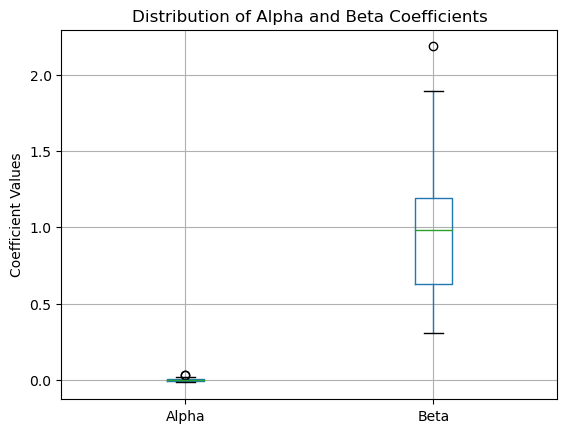

In [34]:
# Print the maximum and minimum values for Beta
print("Min Beta:", regression_results_df['Beta'].min())
print("Max Beta:", regression_results_df['Beta'].max())
print("Mean Beta:", regression_results_df['Beta'].mean())

# Print the maximum and minimum values for Alpha
print("Min Alpha:", regression_results_df['Alpha'].min())
print("Max Alpha:", regression_results_df['Alpha'].max())
print("Mean Alpha:", regression_results_df['Alpha'].mean())

# Create boxplots
regression_results_df[['Alpha', 'Beta']].boxplot()

# Add labels and title
plt.title("Distribution of Alpha and Beta Coefficients")
plt.ylabel("Coefficient Values")
plt.show()

### Step 6: Single-Stock Regression with OLS
For some further analysis of GOOGL the fitted model has been plotted to show the relationship between **GOOGL** and the **index** returns, using a scatter and a fitted regression line based on the single-index model. Some customization has occured as well on the scatter plot such as adjusting alpha, choosing a color for the scatters, labeling and figure size. 

This plot closely resembles the one above (from 'Step 2: Correlation and Covariance of Simple Returns'), which compared the same two assets, though it previously displayed simple returns instead of excess returns. The visual difference is minimal, as the annual interest rate for most data points was below 3%, resulting in a negligible adjustment (0.03/12) to the simple returns. Additionally, this plot includes a regression line for better visualization of the relationship.

Finally, OLS regression is taking place using the `formula.api.ols(formula,data).fit()` from the `statsmodels` (in this case it all has been imported as `sm` at the library import section) library to compare GOOGL's return with the market index. The regression summary and coefficients are printed for analysis.

Key Functions Used:
* `sm.ols()` to define and fit the regression model
* `summary()` to display the regression details
* `params` to extract the estimated coefficients

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the OLS Regression Results (rounded to 4 decimals): </p>

1. **R-squared (0.556)**:
This indicates that the index's returns explain 55.6% of the variance in GOOGL's returns. It reflects the strength of the relationship between GOOGL's returns and the index, showing a moderately strong correlation.

2. **Index Coefficient (1.125)**:
The coefficient of the market index suggests that for every 1% increase in the index's returns, GOOGL's returns increase by approximately 1.125%, on average. This implies that GOOGL is a bit more volatile than the index.

3. **P-value of Index Coefficient (<0.0001)**:
The p-value for the index coefficient is extremely low, indicating that the relationship between GOOGL's returns and the index is statistically significant. 

4. **Intercept (0.0053)**:
The intercept represents the expected return of GOOGL when the index return is zero. While it is small, it suggests a slight positive baseline return for GOOGL, though its p-value (0.315 > 0.05) indicates this is not statistically significant.

5. **F-statistic (103.8) and prob(F-Statistic) (<0.0001)**:
The high F-statistic and its very low p-value demonstrate that the overall regression model is statistically significant, meaning the index returns have explanatory power for GOOGL's returns.

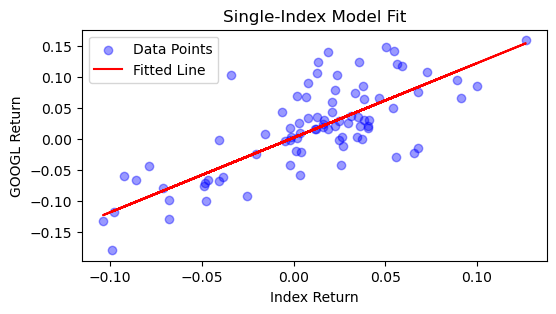

In [35]:
# Plotting the Fitted Model for 'GOOGL' and 'index' returns
plt.figure(figsize=(6, 3)) 
plt.scatter(x=xdata, y=(simple_returns_df['GOOGL']- (rr_data_df["Interest Rate (%)"].values / 12)), label="Data Points", color="blue", alpha=0.4)
plt.plot(xdata, alpha + beta * xdata, color="red", label="Fitted Line")
plt.xlabel("Index Return")
plt.ylabel("GOOGL Return")
plt.title("Single-Index Model Fit")
plt.legend()
plt.show()

In [36]:
# Perform OLS regression 
result = sm.ols(formula='GOOGL ~ index', data=simple_returns_df).fit()

# Print the regression summary
print(result.summary())

# Print the regression summary
print(result.params)

# Market's coefficient
coefficient = result.params['index']
print("Index coefficient: ", coefficient)

                            OLS Regression Results                            
Dep. Variable:                  GOOGL   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 30 Nov 2024   Prob (F-statistic):           2.80e-16
Time:                        23:24:53   Log-Likelihood:                 139.53
No. Observations:                  85   AIC:                            -275.1
Df Residuals:                      83   BIC:                            -270.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0053      0.005      1.011      0.3

---

## **Exercise 5** <a id="Exercise-5"></a>
Compute the covariance matrix of the components of the index using the monthly excess-returns. According to the single-index model, the covariance of a given pair of stocks should be directly proportional to the product of the corresponding $β$ values. Test this hypothesis, and summarise your results in a single graph. Provide a written explanation of your results, and a short critical discussion.

### Solution
<p style="color:blue; font-weight:bold;"> 1. Analyzing the Relationship Between Covariance and Beta Products Values </p> 
This analysis tests the Single-Index Model Hypothesis, illustrating the relationship between stock covariances and the product of their beta values, with a linear regression evaluating the proportionality and fit ($R^2$) of the model.

<p style="color:blue; font-weight:bold;"> 2. Performing OLS Regression to Validate the Single-Index Model Hypothesis </p>
Single-Index Model hypothesis by testing if the covariance between stock pairs is proportional to the product of their beta values, and summarizing the OLS regression results to analyze the strength and significance of this relationship.

### Step 1: Analyzing the Relationship Between Covariance and Beta Products Values
Below the `cov_and_beta_product` function has been created and it takes 1 parameter. The parameter is the **diagonal_offset** and its default value is set to 0. This parameter allows for a comparison of results by setting it to 0 (including the diagonal) or 1 (excluding the diagonal), enabling an analysis of the differences between the two scenarios.

Code explanation: 

1. **Extract Stock Data:** Select all stock columns from **simple_returns_df** (excluding 'index') and compute their covariance matrix (`cov()`).

2. **Monthly Excess Returns:** Calcuate the monthly (discrete) risk-free rate by dividing annual interest rates by 12 and then compute the excess returns for all stocks by subtracting the risk-free rate from their returns in **simple_returns_df**.

3. **Beta Product Matrix:** The **beta_values** variable has been created  is created by extracting beta values from **regression_results_df**, with the stock names set as the index. Next, the `np.outer(beta_values, beta_values)` computes a matrix where each element represents the product of beta values for a pair of stocks, reflecting their theoretical covariance contribution in the Single-Index Model.

4. **Conversion of Matrices to Vectors:** Both the covariance matrix and the beta product matrix are converted into 1D arrays using only the upper triangular elements (excluding duplicates and the diagonal) by using the `triu_indices_from()` of `numpy` to focus on unique stock pair relationships.

5. **Regression Line:** A linear regression (`linergress()`) is performed between the beta product values and covariances, yielding the slope, intercept, and an $R^2$ value to test the proportionality hypothesis.

6. **Plotting:** The scatterplot visualizes the relationship between beta product values and covariances, with the regression line plotted as well to indicate the fit and strength of the relationship. The **alpha** of the plot has been set to 0.4 in order to distinguish the area with the most data points.

7. **Correlation:** The correlation between Covariance and Beta Products has been also calculated by created a DataFrame named **cov_beta**, passing these 2 as columns and calling the `corr()` on the DataFrame.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the 2 different Plots </p>

The difference between the 2 plots is just that while calling the function during the conversion of the matrices to vectors `np.triu_indices_from(matrix, k=diagonal_offset)` for the **cov_matrix.values** and for the **beta_product_matrix** the **diagonal_offset** is set in the first case to 0 (default) and in the second plot to 1. For the comparison of the 2 plots bellow let `X` be the `cov_and_beta_product(0)` and let `Y` be the `cov_and_beta_product(1)`.

1. **Number of Data Points (Dots)**  
    `X`  &rarr; More data points (4851) as it includes all pairs, including the diagonal.  
    `Y`  &rarr; Less data points (4753) as it excludes the diagonal, focusing only on unique stock pairs. The difference between 4851 and 4753 data points is due to the presence of 98 stocks in the dataset. By excluding the diagonal elements, the 98 variances (one for each stock - covariance of itself $COV(X,X) = VAR(X) $) are not included in the analysis, leaving only the covariances between unique stock pairs.
    
2. **Covariance Range**  
    `X`  &rarr; Wider range of covariance values (up to ~ 0.04), likely due to the inclusion of diagonal elements.    
    `Y`  &rarr; Narrower range (~ 0.01), as only off-diagonal covariances are included.  

2.  $R^2$  
    `X`  &rarr; A moderate fit of the regression line with $R^2$ 0.51.  
    `Y`  &rarr; Suggesting a stronger proportionality when excluding the diagonal with $R^2$ 0.60.
    
4. **Regression Line**  
    `X`  &rarr; The regression line shows little or no sign of direct proportionality.   
    `Y`  &rarr; We could say that the regression line fits better reflecting a stronger relationship between covariance and beta products.
    
5. **Correlation**  
    `X`  &rarr; High correlation between the relationship of the covariance and beta products (0.71) 
    `Y`  &rarr; Higher correlation, reflecting a stronger relationship when the diagonal elements are excluded (0.77)
    
6. **Focus of Analysis**  
    `X`  &rarr; This includes variances which might have skewed the analysis.   
    `Y`  &rarr; This focuses solely on covariances between stock pairs aligning more closely with the Single-Index Model hypothesis.

In conclusion, the second plot (`cov_and_beta_product(1)`), where the **diagonal_offset** parameter in `np.triu_indices_from()` is set to 1 (excluding diagonal elements), offers a cleaner and potentially more accurate analysis of the relationship between covariance and beta products (proportionality). While both plots are included in the report for discussion and comparison as they differ, the results from `cov_and_beta_product(1)` will be used and explained for the OLS Regression summary, as they align better with the objectives of the analysis.

In [37]:
def cov_and_beta_product(diagonal_offset=0):
    """
    Calculate and visualize the relationship between the covariance matrix and the beta product matrix
    based on the Single-Index Model hypothesis.

    Parameters:
    - diagonal_offset (int, default=0): Specifies which elements to include in the upper triangular matrix.
      Use `k=0` to include the diagonal and above, or `k=1` to exclude the diagonal and focus on unique pairs.

    Returns:
    - str: Correlation coefficient between covariance and beta product values.
    """
    # Extract stock data (excluding 'index') for covariance computation
    stocks_only = simple_returns_df.columns[:-1]

    # Calculate monthly risk-free rate
    aligned_rr = rr_data_df["Interest Rate (%)"].values / 12  

    # Calculate excess returns for all stocks (subtract the risk-free rate)
    excess_returns_df = simple_returns_df[stocks_only].subtract(aligned_rr, axis=0)

    # Compute covariance
    cov_matrix = excess_returns_df.cov()

    # Align beta values with stocks in the covariance matrix
    beta_values = regression_results_df.set_index("Stock").loc[stocks_only, "Beta"].values

    # Compute beta product matrix (outer product of beta values)
    beta_product_matrix = np.outer(beta_values, beta_values)

    # Convert covariance and beta product matrices into vectors
    cov_values = cov_matrix.values[np.triu_indices_from(cov_matrix.values, k=diagonal_offset)]
    beta_product_values = beta_product_matrix[np.triu_indices_from(beta_product_matrix, k=diagonal_offset)]

    # Perform linear regression to test the hypothesis
    slope, intercept, r_value, p_value, std_err = stats.linregress(beta_product_values, cov_values)

    # Generate predicted regression line values
    regression_line = slope * beta_product_values + intercept

    # Plot covariance vs beta product
    plt.figure(figsize=(8, 6))
    plt.scatter(beta_product_values, cov_values, alpha=0.4, label="Covariance vs Beta Product")
    plt.plot(beta_product_values, regression_line, color="red", label=f"Regression Line ($R^2$ = {r_value**2:.2f})")
    plt.xlabel("Product of Beta Values")
    plt.ylabel("Covariance")
    plt.title("Testing Single-Index Model: Covariance vs Beta Product Values")
    plt.legend()
    plt.show()
    
    # Create a DF
    cov_beta = pd.DataFrame({
        "BetaProduct": beta_product_values,
        "Covariance": cov_values
        })
    
    # Compute the correlation coefficient
    correlation = cov_beta.corr()
    data_points_length = len(beta_product_values)
    return correlation, data_points_length, cov_beta, beta_product_matrix

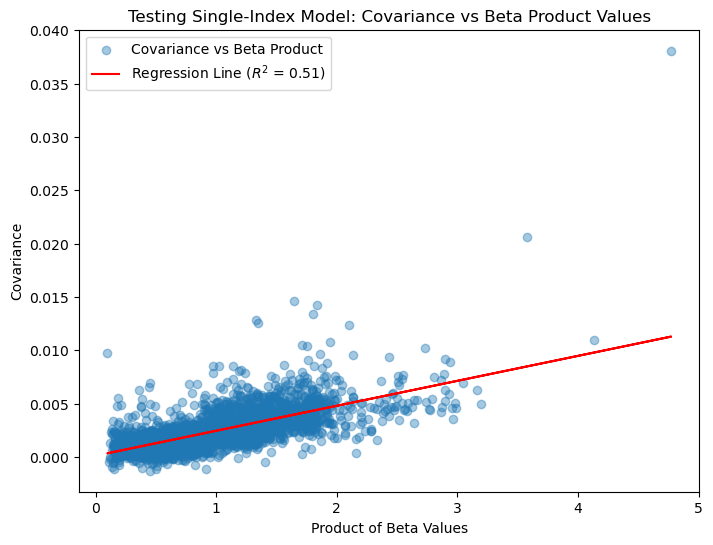

Data points length: 4851
Correlation between Covariance and Beta Products: 0.713


In [38]:
# Call 'cov_and_beta_product()' with default diagonal offset (0)
correlation, data_points_length, cov_beta, beta_product_matrix = cov_and_beta_product()

print(f"Data points length: {data_points_length}")
print(f"Correlation between Covariance and Beta Products: {correlation.iloc[1][0]:.3f}")

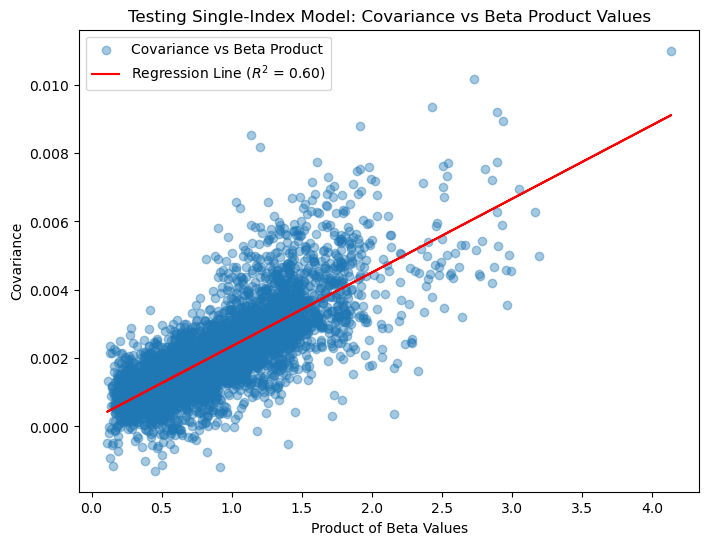

Data points length: 4753
Correlation between Covariance and Beta Products: 0.774


In [39]:
# Call 'cov_and_beta_product()' with the diagonal offset set to 1
correlation, data_points_length, cov_beta, beta_product_matrix = cov_and_beta_product(1)

print(f"Data points length: {data_points_length}")
print(f"Correlation between Covariance and Beta Products: {correlation.iloc[1][0]:.3f}")

### Step 2: Performing OLS Regression to Validate the Single-Index Model Hypothesis
In the code below, a OLS regression is performed to analyze the relationship between 'Covariance' and 'BetaProduct' from the **cov_beta** Dataframe, and the summary of the regression results are displayed.

<p style="color:blue; font-weight:bold; font-size:14px; text-transform:uppercase;"> Observations from the OLS Regression Results</p>

1. The **R-squared** value of 0.599 shows that approximately 60% of the variation in covariance can be explained by the product of beta values. While this suggests a strong relationship, there remains a significant proportion of covariance variation (~ 40%) that is not captured by the beta products (unexplained).

2. The regression coefficient for 'BetaProduct' is 0.0022, which indicates a **strong positive proportionality relationship** between the product of beta values and the covariance of the corresponding stock pairs. This supports the Single-Index Model hypothesis. Furthermore, the p-value for the 'BetaProduct' coefficient is 0.000 indicating that the relationship is statistically significant.

3. The **Durbin-Watson statistic** of 1.757 is close to 2, suggesting little to no significant autocorrelation in the residuals. This indicates that the regression errors are mostly independent, aligning well with the assumptions of the model (non-normality of residuals).

4. According to the **Skew and Kurtosis** statistics they define that the data is not normally distributed and also the **JB with its Prob(JB)** strongly reject the null hypothesis that the data is normally distributed. 


### Critical Short Discussion about the Hypothesis
As per the positive trend from the scatter plot (covariance vs. beta product values) and also the points above, the results support the Single-Index Model's hypothesis that covariance between stock pairs is proportional to the product of their beta values. While the relationship is statistically significant, further exploration of additional factors could improve the model's efficiency and applicability.

In [40]:
# Perform OLS regression
result = sm.ols(formula='Covariance ~ BetaProduct', data=cov_beta).fit()

# Display the OLS regression summary
ols_summary = result.summary()
print(ols_summary)

                            OLS Regression Results                            
Dep. Variable:             Covariance   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     7086.
Date:                Sat, 30 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:24:54   Log-Likelihood:                 26883.
No. Observations:                4753   AIC:                        -5.376e+04
Df Residuals:                    4751   BIC:                        -5.375e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0002   2.57e-05      7.338      

---

## Conclusion

Through this coursework I was able to examine important financial ideas and their real-world implementations, which has been a rewarding and entertaining experience. Stock returns were examined at various frequencies, assessed their statistical characteristics, and determined how well they fit with financial theories like aggregational Gaussianity and normality through the exercises. We explored the Single-Index Model's alpha and beta estimation for equities, offering important insights into their risk and return characteristics.

In order to support the theoretical foundations of contemporary portfolio theory, there was also an investigation on the idea that covariance is proportional to the product of beta values. By calculating statistical measures, creating insightful visualizations, and analyzing the results, I enhanced my understanding of market dynamics and some of the statistical tools employed in financial analysis such as computing excess returns, the linear regression between 2 assets and more.

Overall, this coursework not only solidified my understanding of theoretical models but also emphasized the importance of data-driven decision-making in finance.

---

## **References** <a id="References"></a>

**[1]** Cont, R. (2001). Empirical properties of asset returns: stylized facts and statistical issues. Quantitative Finance, 1(2), 223–236. https://doi.org/10.1080/713665670

**[2]** Elton, E. J., & Gruber, M. J. (1997). Modern portfolio theory, 1950 to date. Journal of Banking and Finance, 21(11–12), 1743–1759. https://doi.org/10.1016/S0378-4266(97)00048-4

**[3]** Dr Bart de Keijzer. Statistics with SciPy(2023) - The Jarque-Bera Test Using a Bootstrap

**[4]** Federal Reserve Bank. Federal Funds Effective Rate [FEDFUNDS]. Retrieved from Federal Reserve Economic Data (FRED), https://fred.stlouisfed.org/series/FEDFUNDS.